In [1]:
%load_ext autoreload
%autoreload 2
import os
# Set environment variables
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".99"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import jax
# from jax import config
# config.update('jax_enable_x64', True)

# Check JAX configuration
devices = jax.local_devices()
print(devices)
print(jax.default_backend())
print(jax.devices())

import sys
# Add custom path
sys.path.append("/pchem-data/meuwly/boittier/home/pycharmm_test/src")

# from model import EF
# from loss import dipole_calc
# from  training import train_model # from model import dipole_calc
import jax
import optax
import e3x

# from dcmnet.analysis import create_model_and_params
# from data import prepare_batches, prepare_datasets
import numpy as np

from physnetjax.model import EF
from physnetjax.loss import dipole_calc
from  physnetjax.training import train_model # from model import dipole_calc
from physnetjax.data import prepare_batches, prepare_datasets


import orbax
from orbax.checkpoint import PyTreeCheckpointer
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

import jax
import jax.numpy as jnp
import flax.linen as nn
import networkx as nx
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import os
# Set environment variables
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".99"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import jax
# from jax import config
# config.update('jax_enable_x64', True)

# Check JAX configuration
devices = jax.local_devices()
print(devices)
print(jax.default_backend())
print(jax.devices())

import sys
# Add custom path
sys.path.append("/pchem-data/meuwly/boittier/home/pycharmm_test/src")

# from model import EF
# from loss import dipole_calc
# from  training import train_model # from model import dipole_calc
import jax
import optax
import e3x

# from dcmnet.analysis import create_model_and_params
# from data import prepare_batches, prepare_datasets
import numpy as np

from physnetjax.model import EF
from physnetjax.loss import dipole_calc
from  physnetjax.training import train_model # from model import dipole_calc
from physnetjax.data import prepare_batches, prepare_datasets


import orbax
from orbax.checkpoint import PyTreeCheckpointer
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

from physnetjax.analysis import *

import polars as pl
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

from tensorflow.python.summary.summary_iterator import summary_iterator



import struct

def read_tensor(value):
    # Assuming the content is a single 32-bit float
    binary_content = value.tensor.tensor_content
    try:
        float_value = struct.unpack('f', binary_content)[0]  # 'f' is for 32-bit float
        # print(f"Decoded float value: {float_value}")
        return value.tag, float_value
    except struct.error:
        # print("Unable to decode binary content as float.")
         return value.tag, 0
    


def tensorboard_to_polars(logdir, i = 0):
    # Read the log file
    data = {}
    for event in summary_iterator(str(logdir)):
        for value in event.summary.value:
            k,v=read_tensor(value)
            data[k] = v
    data["epoch"] = i
    data["log"] = str(logdir)
    if data:
        df = pl.DataFrame(data)
        return df
    else:
        print("No scalar data found in the logdir.")
        return pl.DataFrame()

from pathlib import Path
from physnetjax.utils import get_last, get_files, get_params_model
from physnetjax.analysis import plot_stats, count_params
# restart_dir_base = Path("/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts")
# # Specify the log directory path
# path = restart_dir_base / "test-4ae608b9-b9f8-42e6-9292-4ff3841b9962/tfevents" 
# files = list(path.glob("*"))
# print(files[0])
# # Path to the TensorBoard log file
# log_file = str(files[0])

# # Convert TensorBoard logs to a Polars DataFrame
# base_df = pl.concat([tensorboard_to_polars(str(_),i=i) for i, _ in enumerate(files) ])

# # Display the first few rows
# print(base_df.head())
# print(base_df.columns)
DATA_FILES = ["/pchem-data/meuwly/boittier/home/jaxeq/notebooks/ala-esp-dip-0.npz"]


[CudaDevice(id=0)]
gpu
[CudaDevice(id=0)]


2024-12-15 12:02:40.428954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734260560.450843  317598 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734260560.457674  317598 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[CudaDevice(id=0)]
gpu
[CudaDevice(id=0)]


In [2]:
for l in [0,1,2]:
    for nres in [1,-1]:
        for feat in [32,64,128]:
            for nit in [2,4]:
                job = f"""sbatch --export=ALL,max_degree={l},nres={nres},num_iterations={nit},features={feat},data=/pchem-data/meuwly/boittier/home/jaxeq/notebooks/ala-esp-dip-0.npz,name=cf3all,natoms=37,totalchg=0.0,ntrain=8000,nvalid=1786,nepochs=50000,batch_size=8,schedule="constant" ./submit-job.sh
                """
                print(job)
                # os.system(job)

sbatch --export=ALL,max_degree=0,nres=1,num_iterations=2,features=32,data=/pchem-data/meuwly/boittier/home/jaxeq/notebooks/ala-esp-dip-0.npz,name=cf3all,natoms=37,totalchg=0.0,ntrain=8000,nvalid=1786,nepochs=50000,batch_size=8,schedule="constant" ./submit-job.sh
                
sbatch --export=ALL,max_degree=0,nres=1,num_iterations=4,features=32,data=/pchem-data/meuwly/boittier/home/jaxeq/notebooks/ala-esp-dip-0.npz,name=cf3all,natoms=37,totalchg=0.0,ntrain=8000,nvalid=1786,nepochs=50000,batch_size=8,schedule="constant" ./submit-job.sh
                
sbatch --export=ALL,max_degree=0,nres=1,num_iterations=2,features=64,data=/pchem-data/meuwly/boittier/home/jaxeq/notebooks/ala-esp-dip-0.npz,name=cf3all,natoms=37,totalchg=0.0,ntrain=8000,nvalid=1786,nepochs=50000,batch_size=8,schedule="constant" ./submit-job.sh
                
sbatch --export=ALL,max_degree=0,nres=1,num_iterations=4,features=64,data=/pchem-data/meuwly/boittier/home/jaxeq/notebooks/ala-esp-dip-0.npz,name=cf3all,natoms=

In [3]:
for l in [0,]:
    for nres in [1]:
        for feat in [64]:
            for nit in [4]:
                job = f"""sbatch --export=ALL,max_degree={l},nres={nres},num_iterations={nit},features={feat},data=/pchem-data/meuwly/boittier/home/cf3criegee_27887.npz,name=cf3all,natoms=8,totalchg=0.0,ntrain=23887,nvalid=4000,nepochs=50000,batch_size=8,schedule="constant" ./submit-job.sh
                """
                print(job)
                # os.system(job)

sbatch --export=ALL,max_degree=0,nres=1,num_iterations=4,features=64,data=/pchem-data/meuwly/boittier/home/cf3criegee_27887.npz,name=cf3all,natoms=8,totalchg=0.0,ntrain=23887,nvalid=4000,nepochs=50000,batch_size=8,schedule="constant" ./submit-job.sh
                


In [ ]:
file_names = []
ls = []
fs = []
nits = []
for of in outfiles:
    with open(of) as f:
        lines = f.readlines(30000)
        sel = [bytes(_, "utf8").decode("utf8") for _ in lines if "cf3all-" in _]
        sel2 = [bytes(_, "utf8").decode("utf8") for _ in lines if "epoch" in _]
        file_names.append("".join([sel[0].strip(),sel2[2].strip()]).strip())
        l = [int(_.split("=")[-1].strip()) for _ in lines[:100] if _.startswith("    max_degree")]
        f = [int(_.split("=")[-1].strip()) for _ in lines[:100] if _.startswith("    feat")]
        nit = [int(_.split("=")[-1].strip()) for _ in lines[:100] if _.startswith("    num_i")]
        ls.append(l)
        fs.append(f)
        nits.append(nit)

In [58]:
data_key, train_key = jax.random.split(
    jax.random.PRNGKey(43), 2)
# NATOMS = 8
# files = ["/pchem-data/meuwly/boittier/home/cf3criegee_27887.npz"]
NATOMS = 37
files = ["/pchem-data/meuwly/boittier/home/jaxeq/notebooks/ala-esp-dip-0.npz"]
train_data, valid_data = prepare_datasets(data_key, 8000, 1786,
                                          files, 
                                          clip_esp=False, natoms=NATOMS, clean=False)

shape (9786, 37, 3) not failed [   0    1    2 ... 9783 9784 9785]
dataR (9786, 37, 3)
D (9786, 3)
R (9786, 37, 3)
(9786, 37, 3)
['R', 'Z', 'F', 'E', 'N', 'D', 'com']
9786
0 R 9786 (9786, 37, 3)
1 Z 9786 (9786, 37)
2 F 9786 (9786, 37, 3)
3 E 9786 (9786, 1)
4 N 9786 (9786, 1)
5 D 9786 (9786, 3)
6 com 9786 (9786, 3)


In [59]:
ntest = len(valid_data["E"]) // 2
print(ntest)
test_data = {k: v[ntest:] for k, v in valid_data.items()}
valid_data = {k: v[:ntest] for k, v in valid_data.items()}


893


In [60]:
model = EF(
    # attributes
    features = 128,
    max_degree = 0,
    num_iterations = 5,
    num_basis_functions = 64,
    cutoff = 10.0,
    max_atomic_number = 12,
    charges = True,
    natoms=NATOMS,
    total_charge=0,
    n_res=4,
    zbl=True,
    # debug=["ele", "dist", "idx"],
)
model

EF(
    # attributes
    features = 128
    max_degree = 0
    num_iterations = 5
    num_basis_functions = 64
    cutoff = 10.0
    max_atomic_number = 12
    charges = True
    natoms = 37
    total_charge = 0
    n_res = 4
    zbl = True
    debug = False
)

In [68]:
import pandas as pd


data_keys = ("R", "Z", "F", "E", "D", "N", "dst_idx", "src_idx", "batch_segments")

batch_size = 2000
batch_size = 47

test_batches = prepare_batches(data_key, test_data, batch_size,
                              num_atoms=NATOMS, 
                              data_keys=data_keys)

train_batches = prepare_batches(data_key, train_data, batch_size,
                              num_atoms=NATOMS, 
                              data_keys=data_keys)

valid_batches = prepare_batches(data_key, valid_data, batch_size,
                              num_atoms=NATOMS, 
                              data_keys=data_keys)

combined = test_batches #+ valid_batches #+ train_batches
len(combined)

19

In [69]:
restart_dirs = ["cf3all-d069b2ca-0c5a-4fcd-b597-f8b28933693a",
"cf3all-a54b1970-25ee-4e9e-99d2-f76ae85cee6b",
"cf3all-8fa877e8-b561-47b7-9bcb-e23ad24371dc",
"cf3all-a9732697-ef01-4a54-812d-0456a2005076",
"cf3all-e94f959c-5f22-4b8a-800e-dd6197c07b20",
"cf3all-caf3d3d3-2a41-4737-af5e-233e2b5253a3",
"cf3all-05f0b23f-a6ca-455e-aeee-398d3ae6ff3d",
"cf3all-88eb2a0f-0dff-42a4-ab9d-621708453ff0",
"cf3all-eb18a03d-566e-4754-bcd0-7072998258df",
"cf3all-9fa0c7f2-dbff-4fbd-8f5c-12c8783816ae",
"cf3all-ecbb2297-d619-4bcf-9607-df23dfbce0dc",
"cf3all-ba34e2a6-090d-4ce7-9157-9ebcb492126c",
"cf3all-d74dfdc6-9673-4d47-98d4-361df28325f2",
"cf3all-18308861-b060-4b42-9a74-cb7504854a31",
"cf3all-560de4a4-3aa1-4822-8323-ab81b99f670e",
"cf3all-a9319d68-79aa-4913-98fe-2b09124fa1c8",
"cf3all-c0aca3a8-2a60-4480-b4c4-3c4ac076cc3e",
"cf3all-e8f16968-8b64-467b-a772-54d3594d516b",
"cf3all-1407135e-8deb-4cf6-a844-e0cc2bb44959",
"cf3all-08581d62-6dd2-4e78-a5b2-45cf6a4b6998",
"cf3all-cf8defb3-4024-4945-8eea-c7ed08320d04",
"cf3all-08a41d2b-b8f1-4a52-89ab-e0e3991a9b80",
"cf3all-ab54bbb8-1d99-4852-90f0-be5de65b1e0f",
"cf3all-948ae050-aeb3-47c2-9d55-7feed5b0a457",
"cf3all-11a2f3ed-8f24-42f6-9826-e771bbcda48c",
"cf3all-790736d2-59d2-4e61-9f61-2adbc68adf89",
"cf3all-de829b95-6df7-40aa-8095-89d63908ac50",
"cf3all-a45b7f73-3c7d-41c5-96e0-f0a83889293a",
"cf3all-3f0b4338-3dc7-4006-be1f-39255bd8003a",
"cf3all-893efd80-8eb6-4386-ad09-c3e8fa5c97ec",
"cf3all-b8b88599-315a-425a-adfd-8807e351f9c2",
"cf3all-071ebbc2-85b2-4ee6-93bb-4e4452726874",
"cf3all-272ee1d9-6570-4e22-b821-2ac104a822f2",
"cf3all-8c68a176-8a3f-442b-b68d-ba46b51fb335"]
CKPTPWD = Path("/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/")
restart_dirs = [CKPTPWD / _ for _ in restart_dirs]

In [64]:
epochs_reached = []

for restart_dir in restart_dirs:
    restart = get_last(restart_dir)
    print(restart.name)
    epochs_reached.append(restart.name)

epochs_reached.sort(key=lambda x: int(x.split("-")[1]))
min_epoch = epochs_reached[0]
min_epoch


epoch-5747
epoch-17168
epoch-14700
epoch-14974
epoch-13742
epoch-10037
epoch-3855
epoch-19392
epoch-14864
epoch-6864
epoch-3470
epoch-17497
epoch-3568
epoch-14128
epoch-17856
epoch-263
epoch-6846
epoch-5726
epoch-981
epoch-1879
epoch-2007
epoch-5956
epoch-1868
epoch-1650
epoch-13661
epoch-3560
epoch-17262
epoch-2031
epoch-950
epoch-9668
epoch-6541
epoch-15213
epoch-13902
epoch-461


'epoch-263'

In [35]:

for res in restart_dirs:
    job = f"""sbatch --export=ALL,restart={res},data=/pchem-data/meuwly/boittier/home/cf3criegee_27887.npz,name=cf3all,natoms=8,totalchg=0.0,ntrain=23887,nvalid=4000,nepochs=50000,batch_size=50,forces_w=1.0,schedule="warmup" ./submit-job.sh"""
    # os.system(job)

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 1
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.30it/s]

predF.shape (5217,)


2it [00:02,  1.15s/it]

predF.shape (5217,)


3it [00:02,  1.03it/s]

predF.shape (5217,)


4it [00:03,  1.13it/s]

predF.shape (5217,)


5it [00:04,  1.17it/s]

predF.shape (5217,)


6it [00:05,  1.21it/s]

predF.shape (5217,)


7it [00:06,  1.23it/s]

predF.shape (5217,)


8it [00:06,  1.24it/s]

predF.shape (5217,)


9it [00:07,  1.25it/s]

predF.shape (5217,)


10it [00:08,  1.26it/s]

predF.shape (5217,)


11it [00:09,  1.27it/s]

predF.shape (5217,)


12it [00:09,  1.27it/s]

predF.shape (5217,)


13it [00:10,  1.27it/s]

predF.shape (5217,)


14it [00:11,  1.27it/s]

predF.shape (5217,)


15it [00:12,  1.28it/s]

predF.shape (5217,)


16it [00:13,  1.28it/s]

predF.shape (5217,)


17it [00:13,  1.28it/s]

predF.shape (5217,)


18it [00:14,  1.28it/s]

predF.shape (5217,)


19it [00:15,  1.23it/s]

predF.shape (5217,)


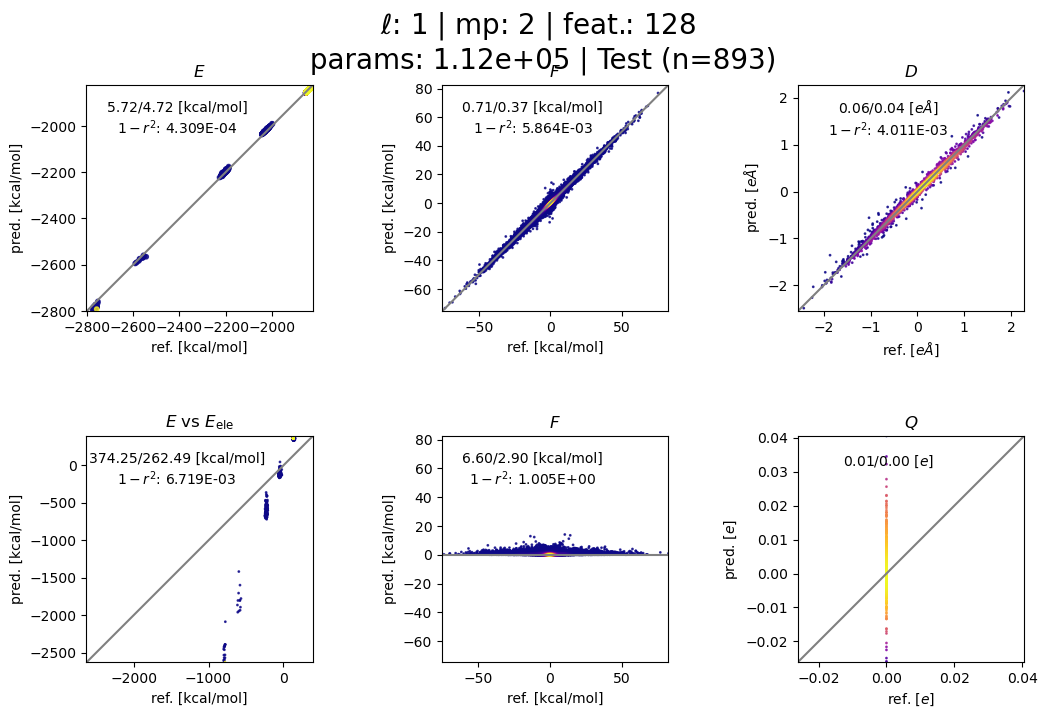

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 0
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.58it/s]

predF.shape (5217,)


2it [00:01,  1.58it/s]

predF.shape (5217,)


3it [00:01,  1.58it/s]

predF.shape (5217,)


4it [00:02,  1.58it/s]

predF.shape (5217,)


5it [00:03,  1.58it/s]

predF.shape (5217,)


6it [00:03,  1.58it/s]

predF.shape (5217,)


7it [00:04,  1.58it/s]

predF.shape (5217,)


8it [00:05,  1.58it/s]

predF.shape (5217,)


9it [00:05,  1.58it/s]

predF.shape (5217,)


10it [00:06,  1.58it/s]

predF.shape (5217,)


11it [00:06,  1.58it/s]

predF.shape (5217,)


12it [00:07,  1.58it/s]

predF.shape (5217,)


13it [00:08,  1.58it/s]

predF.shape (5217,)


14it [00:08,  1.58it/s]

predF.shape (5217,)


15it [00:09,  1.58it/s]

predF.shape (5217,)


16it [00:10,  1.58it/s]

predF.shape (5217,)


17it [00:10,  1.58it/s]

predF.shape (5217,)


18it [00:11,  1.58it/s]

predF.shape (5217,)


19it [00:12,  1.58it/s]

predF.shape (5217,)


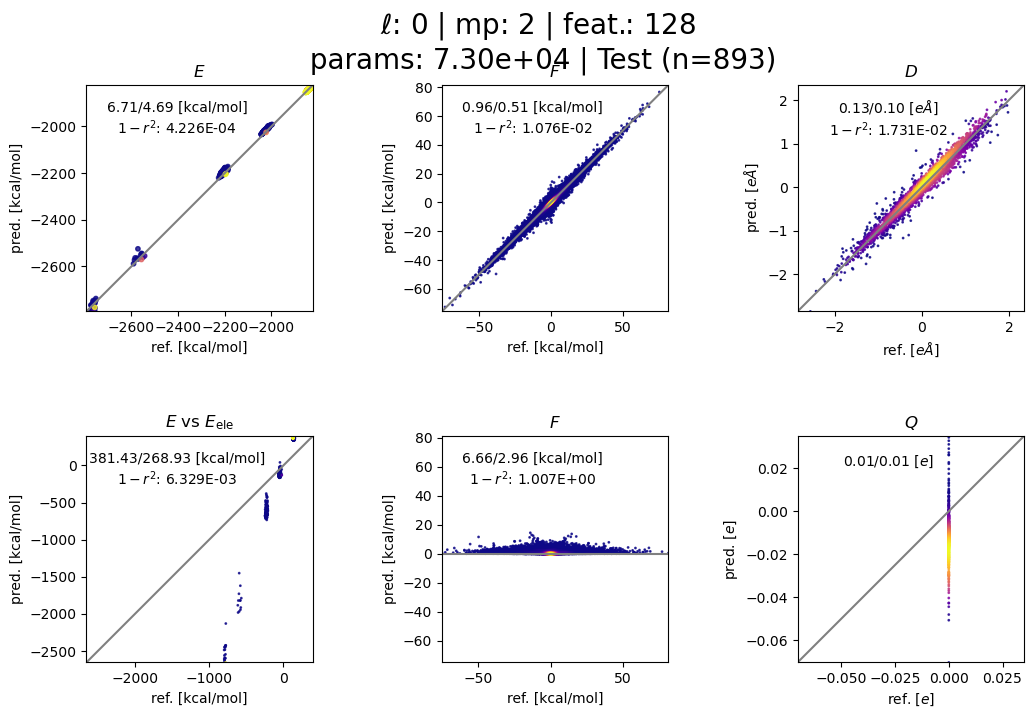

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 1
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.31it/s]

predF.shape (5217,)


2it [00:01,  1.31it/s]

predF.shape (5217,)


3it [00:02,  1.31it/s]

predF.shape (5217,)


4it [00:03,  1.31it/s]

predF.shape (5217,)


5it [00:03,  1.31it/s]

predF.shape (5217,)


6it [00:04,  1.31it/s]

predF.shape (5217,)


7it [00:05,  1.31it/s]

predF.shape (5217,)


8it [00:06,  1.32it/s]

predF.shape (5217,)


9it [00:06,  1.32it/s]

predF.shape (5217,)


10it [00:07,  1.32it/s]

predF.shape (5217,)


11it [00:08,  1.32it/s]

predF.shape (5217,)


12it [00:09,  1.32it/s]

predF.shape (5217,)


13it [00:09,  1.32it/s]

predF.shape (5217,)


14it [00:10,  1.32it/s]

predF.shape (5217,)


15it [00:11,  1.32it/s]

predF.shape (5217,)


16it [00:12,  1.32it/s]

predF.shape (5217,)


17it [00:12,  1.32it/s]

predF.shape (5217,)


18it [00:13,  1.32it/s]

predF.shape (5217,)


19it [00:14,  1.32it/s]

predF.shape (5217,)


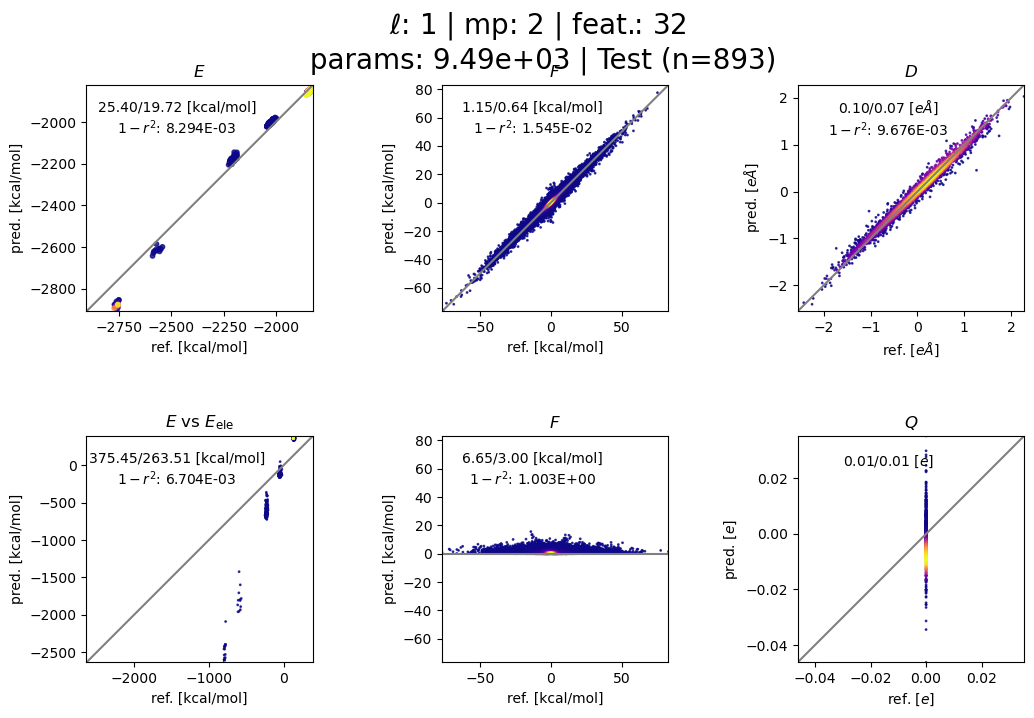

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 0
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.09s/it]

predF.shape (5217,)


2it [00:02,  1.09s/it]

predF.shape (5217,)


3it [00:03,  1.09s/it]

predF.shape (5217,)


4it [00:04,  1.09s/it]

predF.shape (5217,)


5it [00:05,  1.09s/it]

predF.shape (5217,)


6it [00:06,  1.09s/it]

predF.shape (5217,)


7it [00:07,  1.09s/it]

predF.shape (5217,)


8it [00:08,  1.09s/it]

predF.shape (5217,)


9it [00:09,  1.09s/it]

predF.shape (5217,)


10it [00:10,  1.09s/it]

predF.shape (5217,)


11it [00:12,  1.09s/it]

predF.shape (5217,)


12it [00:13,  1.09s/it]

predF.shape (5217,)


13it [00:14,  1.09s/it]

predF.shape (5217,)


14it [00:15,  1.09s/it]

predF.shape (5217,)


15it [00:16,  1.09s/it]

predF.shape (5217,)


16it [00:17,  1.10s/it]

predF.shape (5217,)


17it [00:18,  1.10s/it]

predF.shape (5217,)


18it [00:19,  1.10s/it]

predF.shape (5217,)


19it [00:20,  1.09s/it]

predF.shape (5217,)


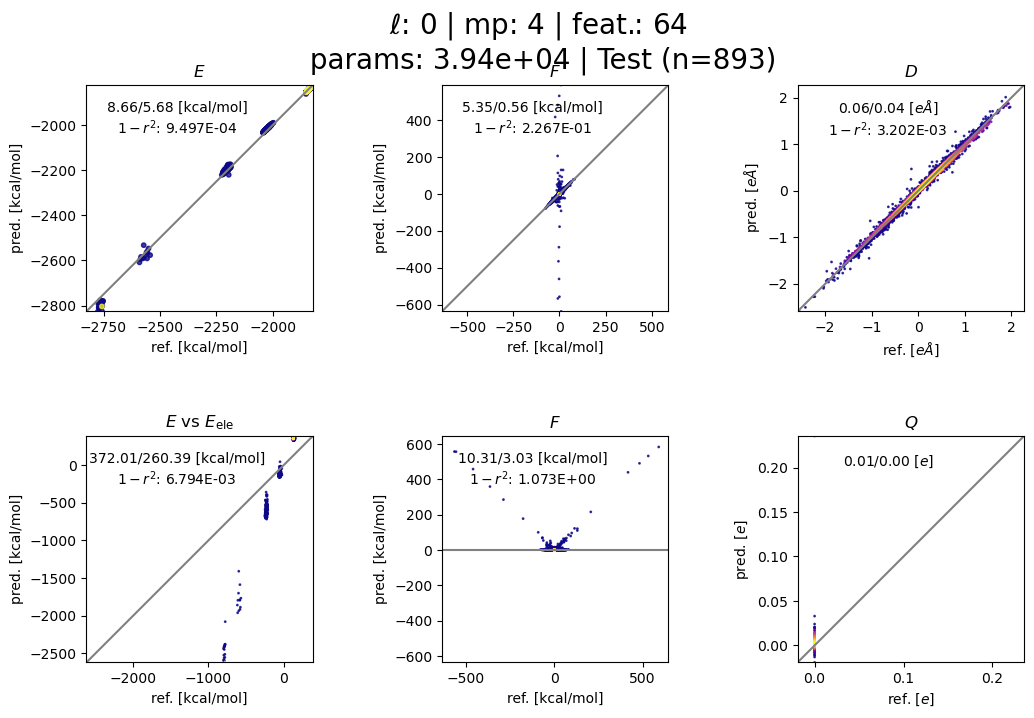

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 0
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.11s/it]

predF.shape (5217,)


2it [00:02,  1.11s/it]

predF.shape (5217,)


3it [00:03,  1.11s/it]

predF.shape (5217,)


4it [00:04,  1.11s/it]

predF.shape (5217,)


5it [00:05,  1.11s/it]

predF.shape (5217,)


6it [00:06,  1.11s/it]

predF.shape (5217,)


7it [00:07,  1.11s/it]

predF.shape (5217,)


8it [00:08,  1.11s/it]

predF.shape (5217,)


9it [00:09,  1.11s/it]

predF.shape (5217,)


10it [00:11,  1.10s/it]

predF.shape (5217,)


11it [00:12,  1.10s/it]

predF.shape (5217,)


12it [00:13,  1.10s/it]

predF.shape (5217,)


13it [00:14,  1.10s/it]

predF.shape (5217,)


14it [00:15,  1.10s/it]

predF.shape (5217,)


15it [00:16,  1.10s/it]

predF.shape (5217,)


16it [00:17,  1.10s/it]

predF.shape (5217,)


17it [00:18,  1.10s/it]

predF.shape (5217,)


18it [00:19,  1.10s/it]

predF.shape (5217,)


19it [00:20,  1.11s/it]

predF.shape (5217,)


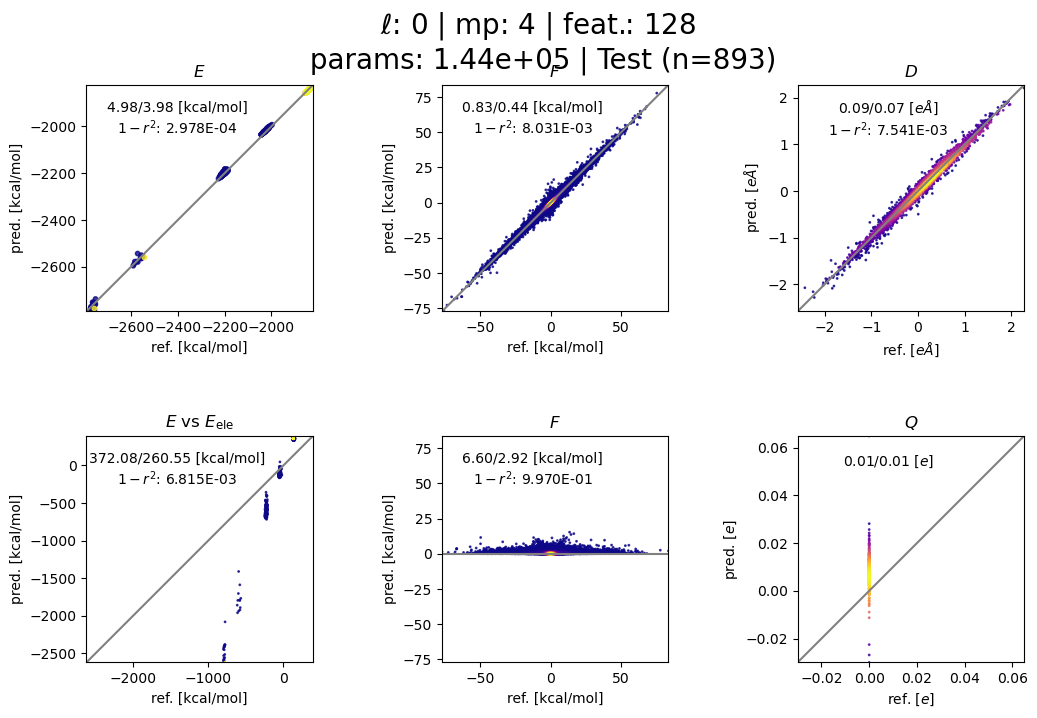

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 1
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:02,  2.98s/it]

predF.shape (5217,)


2it [00:03,  1.67s/it]

predF.shape (5217,)


3it [00:04,  1.25s/it]

predF.shape (5217,)


4it [00:05,  1.06s/it]

predF.shape (5217,)


5it [00:06,  1.05it/s]

predF.shape (5217,)


6it [00:06,  1.13it/s]

predF.shape (5217,)


7it [00:07,  1.18it/s]

predF.shape (5217,)


8it [00:08,  1.22it/s]

predF.shape (5217,)


9it [00:09,  1.24it/s]

predF.shape (5217,)


10it [00:09,  1.26it/s]

predF.shape (5217,)


11it [00:10,  1.27it/s]

predF.shape (5217,)


12it [00:11,  1.28it/s]

predF.shape (5217,)


13it [00:12,  1.29it/s]

predF.shape (5217,)


14it [00:12,  1.30it/s]

predF.shape (5217,)


15it [00:13,  1.31it/s]

predF.shape (5217,)


16it [00:14,  1.31it/s]

predF.shape (5217,)


17it [00:15,  1.32it/s]

predF.shape (5217,)


18it [00:15,  1.32it/s]

predF.shape (5217,)


19it [00:16,  1.14it/s]

predF.shape (5217,)


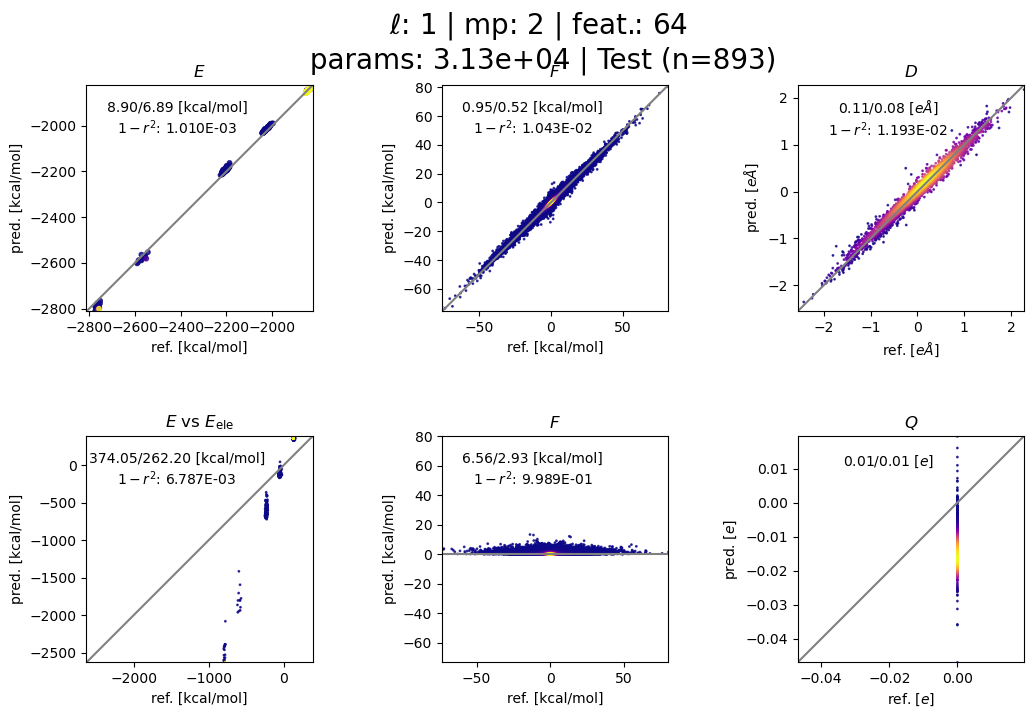

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 1
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:02,  2.62s/it]

predF.shape (5217,)


2it [00:04,  1.93s/it]

predF.shape (5217,)


3it [00:05,  1.70s/it]

predF.shape (5217,)


4it [00:06,  1.60s/it]

predF.shape (5217,)


5it [00:08,  1.54s/it]

predF.shape (5217,)


6it [00:09,  1.51s/it]

predF.shape (5217,)


7it [00:11,  1.49s/it]

predF.shape (5217,)


8it [00:12,  1.47s/it]

predF.shape (5217,)


9it [00:14,  1.46s/it]

predF.shape (5217,)


10it [00:15,  1.46s/it]

predF.shape (5217,)


11it [00:17,  1.45s/it]

predF.shape (5217,)


12it [00:18,  1.45s/it]

predF.shape (5217,)


13it [00:20,  1.64s/it]

predF.shape (5217,)


14it [00:22,  1.58s/it]

predF.shape (5217,)


15it [00:23,  1.54s/it]

predF.shape (5217,)


16it [00:24,  1.52s/it]

predF.shape (5217,)


17it [00:26,  1.50s/it]

predF.shape (5217,)


18it [00:27,  1.48s/it]

predF.shape (5217,)


19it [00:29,  1.54s/it]

predF.shape (5217,)


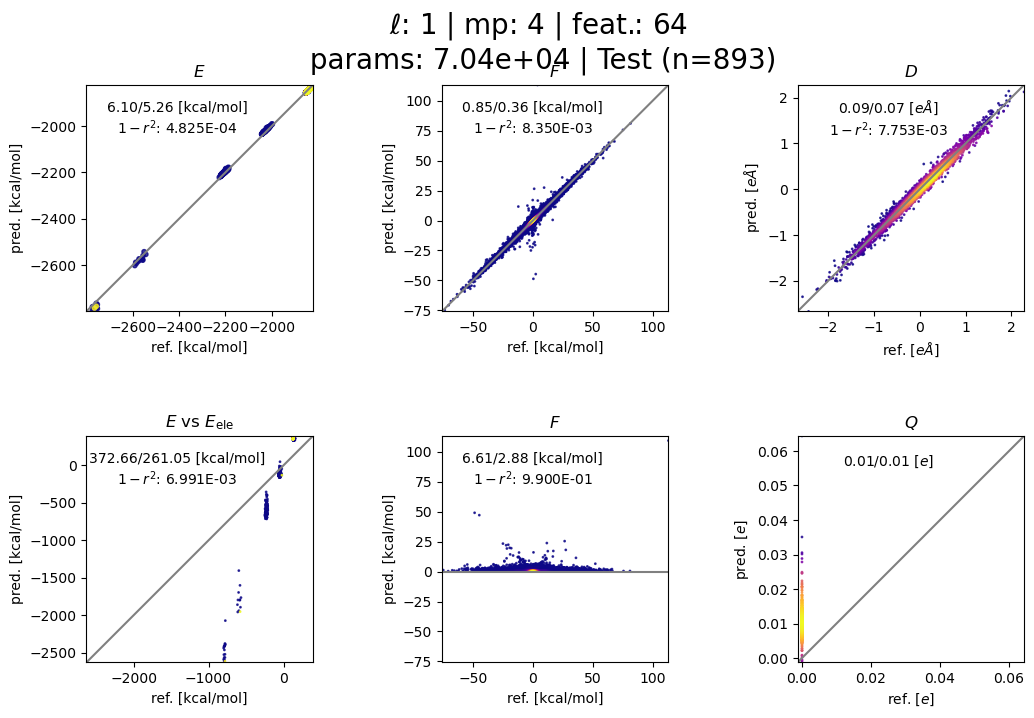

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 0
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.04s/it]

predF.shape (5217,)


2it [00:01,  1.25it/s]

predF.shape (5217,)


3it [00:02,  1.38it/s]

predF.shape (5217,)


4it [00:02,  1.45it/s]

predF.shape (5217,)


5it [00:03,  1.50it/s]

predF.shape (5217,)


6it [00:04,  1.53it/s]

predF.shape (5217,)


7it [00:04,  1.54it/s]

predF.shape (5217,)


8it [00:05,  1.56it/s]

predF.shape (5217,)


9it [00:06,  1.57it/s]

predF.shape (5217,)


10it [00:06,  1.57it/s]

predF.shape (5217,)


11it [00:07,  1.58it/s]

predF.shape (5217,)


12it [00:07,  1.58it/s]

predF.shape (5217,)


13it [00:08,  1.58it/s]

predF.shape (5217,)


14it [00:09,  1.58it/s]

predF.shape (5217,)


15it [00:09,  1.58it/s]

predF.shape (5217,)


16it [00:10,  1.58it/s]

predF.shape (5217,)


17it [00:11,  1.58it/s]

predF.shape (5217,)


18it [00:11,  1.58it/s]

predF.shape (5217,)


19it [00:12,  1.53it/s]

predF.shape (5217,)


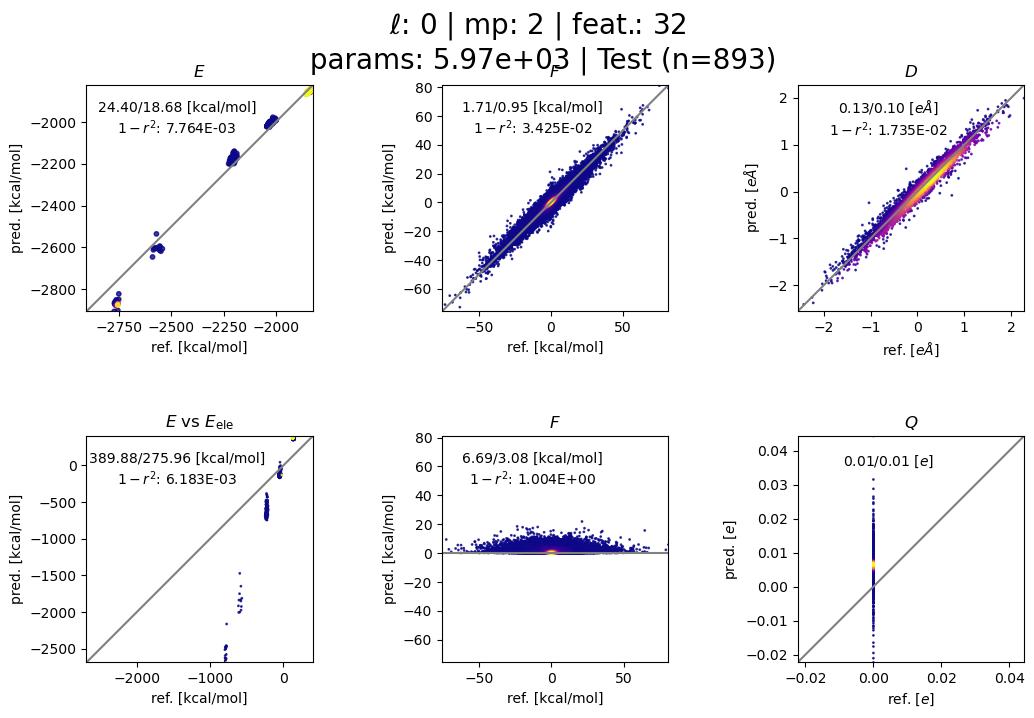

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 1
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.32it/s]

predF.shape (5217,)


2it [00:01,  1.32it/s]

predF.shape (5217,)


3it [00:02,  1.32it/s]

predF.shape (5217,)


4it [00:03,  1.30it/s]

predF.shape (5217,)


5it [00:03,  1.30it/s]

predF.shape (5217,)


6it [00:04,  1.31it/s]

predF.shape (5217,)


7it [00:05,  1.31it/s]

predF.shape (5217,)


8it [00:06,  1.31it/s]

predF.shape (5217,)


9it [00:06,  1.31it/s]

predF.shape (5217,)


10it [00:07,  1.31it/s]

predF.shape (5217,)


11it [00:08,  1.31it/s]

predF.shape (5217,)


12it [00:09,  1.32it/s]

predF.shape (5217,)


13it [00:09,  1.32it/s]

predF.shape (5217,)


14it [00:10,  1.32it/s]

predF.shape (5217,)


15it [00:11,  1.32it/s]

predF.shape (5217,)


16it [00:12,  1.32it/s]

predF.shape (5217,)


17it [00:12,  1.32it/s]

predF.shape (5217,)


18it [00:13,  1.32it/s]

predF.shape (5217,)


19it [00:14,  1.31it/s]

predF.shape (5217,)


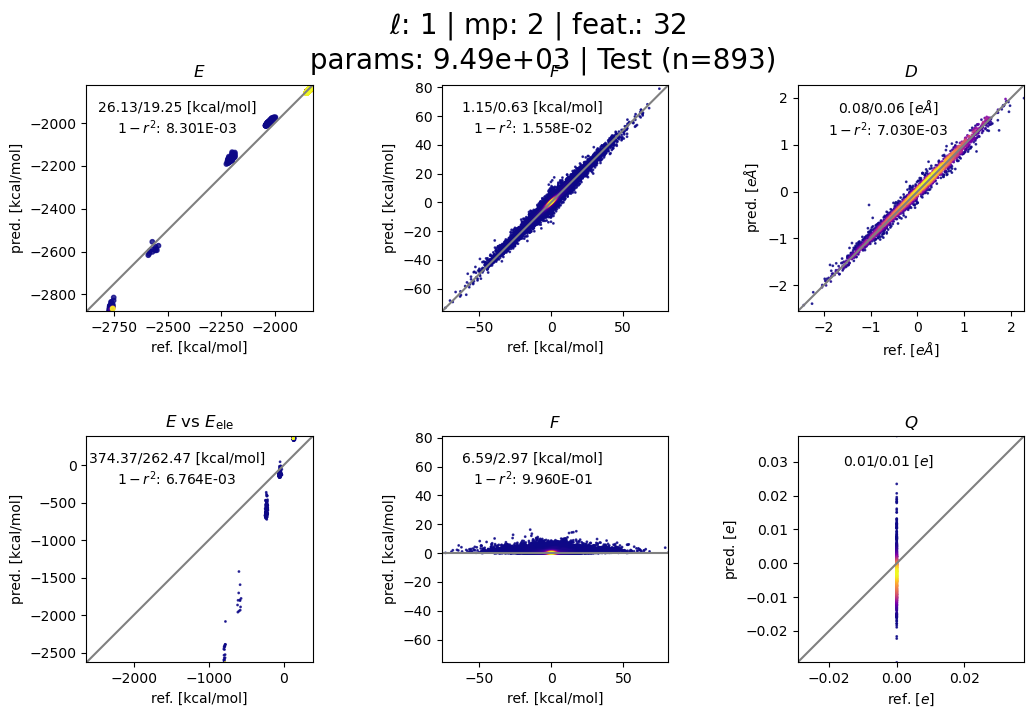

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 2
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:04,  4.70s/it]

predF.shape (5217,)


2it [00:05,  2.48s/it]

predF.shape (5217,)


3it [00:06,  1.76s/it]

predF.shape (5217,)


4it [00:07,  1.43s/it]

predF.shape (5217,)


5it [00:08,  1.24s/it]

predF.shape (5217,)


6it [00:09,  1.13s/it]

predF.shape (5217,)


7it [00:10,  1.06s/it]

predF.shape (5217,)


8it [00:11,  1.01s/it]

predF.shape (5217,)


9it [00:12,  1.02it/s]

predF.shape (5217,)


10it [00:12,  1.04it/s]

predF.shape (5217,)


11it [00:13,  1.06it/s]

predF.shape (5217,)


12it [00:14,  1.07it/s]

predF.shape (5217,)


13it [00:15,  1.08it/s]

predF.shape (5217,)


14it [00:16,  1.08it/s]

predF.shape (5217,)


15it [00:18,  1.12s/it]

predF.shape (5217,)


16it [00:19,  1.06s/it]

predF.shape (5217,)


17it [00:19,  1.01s/it]

predF.shape (5217,)


18it [00:20,  1.02it/s]

predF.shape (5217,)


19it [00:21,  1.15s/it]

predF.shape (5217,)


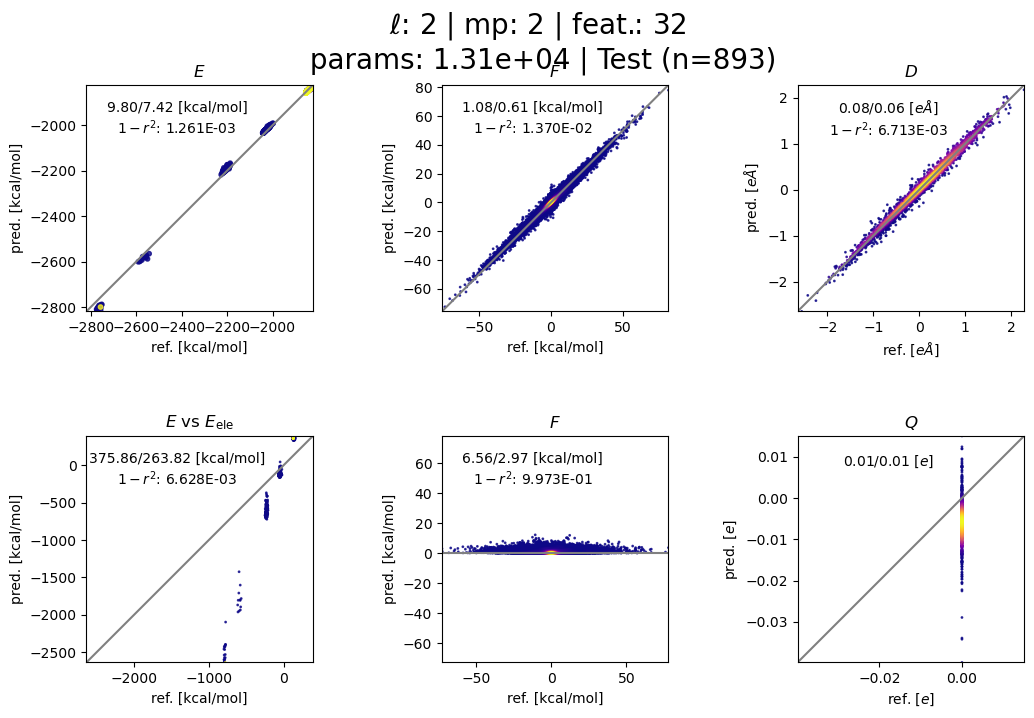

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 1
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.46s/it]

predF.shape (5217,)


2it [00:02,  1.45s/it]

predF.shape (5217,)


3it [00:04,  1.45s/it]

predF.shape (5217,)


4it [00:05,  1.45s/it]

predF.shape (5217,)


5it [00:07,  1.45s/it]

predF.shape (5217,)


6it [00:08,  1.45s/it]

predF.shape (5217,)


7it [00:10,  1.45s/it]

predF.shape (5217,)


8it [00:11,  1.45s/it]

predF.shape (5217,)


9it [00:13,  1.45s/it]

predF.shape (5217,)


10it [00:14,  1.45s/it]

predF.shape (5217,)


11it [00:15,  1.45s/it]

predF.shape (5217,)


12it [00:17,  1.45s/it]

predF.shape (5217,)


13it [00:18,  1.45s/it]

predF.shape (5217,)


14it [00:20,  1.45s/it]

predF.shape (5217,)


15it [00:21,  1.45s/it]

predF.shape (5217,)


16it [00:23,  1.45s/it]

predF.shape (5217,)


17it [00:24,  1.46s/it]

predF.shape (5217,)


18it [00:26,  1.45s/it]

predF.shape (5217,)


19it [00:27,  1.45s/it]

predF.shape (5217,)


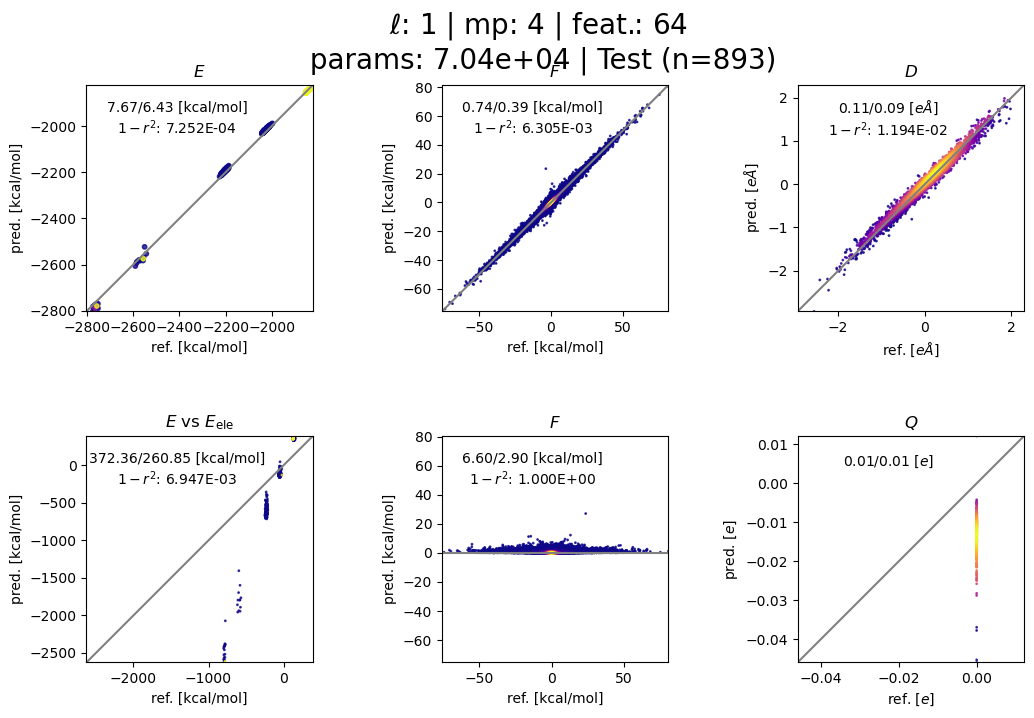

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 0
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.58it/s]

predF.shape (5217,)


2it [00:01,  1.58it/s]

predF.shape (5217,)


3it [00:01,  1.58it/s]

predF.shape (5217,)


4it [00:02,  1.58it/s]

predF.shape (5217,)


5it [00:03,  1.58it/s]

predF.shape (5217,)


6it [00:03,  1.58it/s]

predF.shape (5217,)


7it [00:04,  1.58it/s]

predF.shape (5217,)


8it [00:05,  1.58it/s]

predF.shape (5217,)


9it [00:05,  1.58it/s]

predF.shape (5217,)


10it [00:06,  1.58it/s]

predF.shape (5217,)


11it [00:06,  1.58it/s]

predF.shape (5217,)


12it [00:07,  1.58it/s]

predF.shape (5217,)


13it [00:08,  1.58it/s]

predF.shape (5217,)


14it [00:08,  1.58it/s]

predF.shape (5217,)


15it [00:09,  1.58it/s]

predF.shape (5217,)


16it [00:10,  1.58it/s]

predF.shape (5217,)


17it [00:10,  1.58it/s]

predF.shape (5217,)


18it [00:11,  1.58it/s]

predF.shape (5217,)


19it [00:12,  1.58it/s]

predF.shape (5217,)


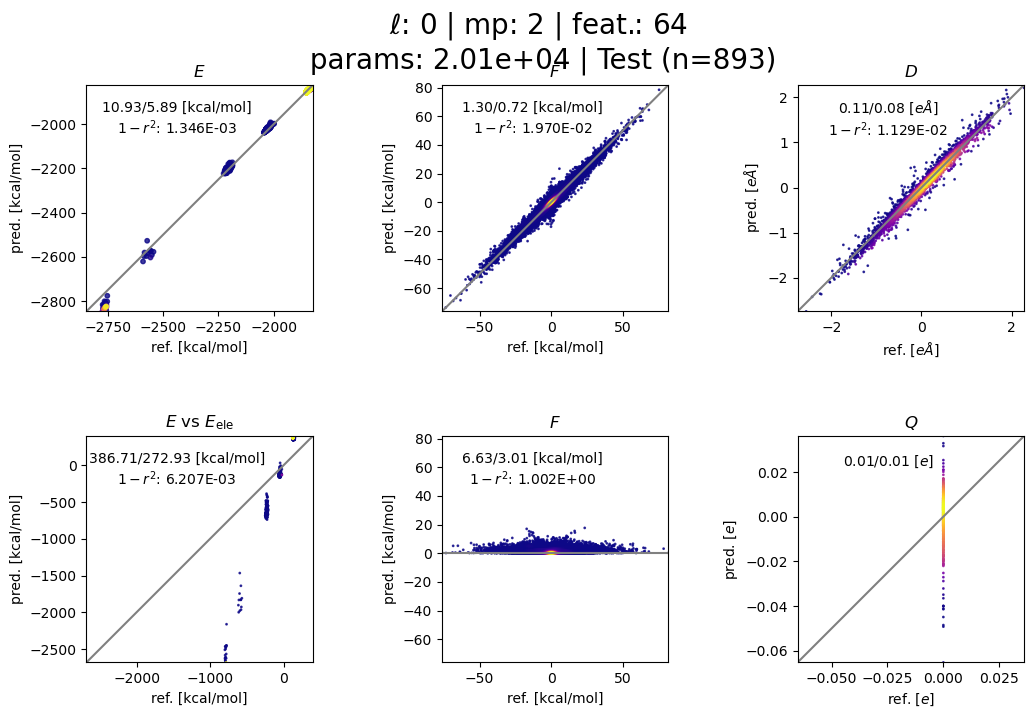

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 2
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:04,  4.17s/it]

predF.shape (5217,)


2it [00:05,  2.26s/it]

predF.shape (5217,)


3it [00:06,  1.64s/it]

predF.shape (5217,)


4it [00:06,  1.36s/it]

predF.shape (5217,)


5it [00:07,  1.20s/it]

predF.shape (5217,)


6it [00:08,  1.10s/it]

predF.shape (5217,)


7it [00:09,  1.04s/it]

predF.shape (5217,)


8it [00:10,  1.00it/s]

predF.shape (5217,)


9it [00:11,  1.03it/s]

predF.shape (5217,)


10it [00:12,  1.05it/s]

predF.shape (5217,)


11it [00:13,  1.06it/s]

predF.shape (5217,)


12it [00:14,  1.07it/s]

predF.shape (5217,)


13it [00:15,  1.07it/s]

predF.shape (5217,)


14it [00:16,  1.08it/s]

predF.shape (5217,)


15it [00:16,  1.08it/s]

predF.shape (5217,)


16it [00:17,  1.09it/s]

predF.shape (5217,)


17it [00:18,  1.09it/s]

predF.shape (5217,)


18it [00:19,  1.09it/s]

predF.shape (5217,)


19it [00:20,  1.09s/it]

predF.shape (5217,)


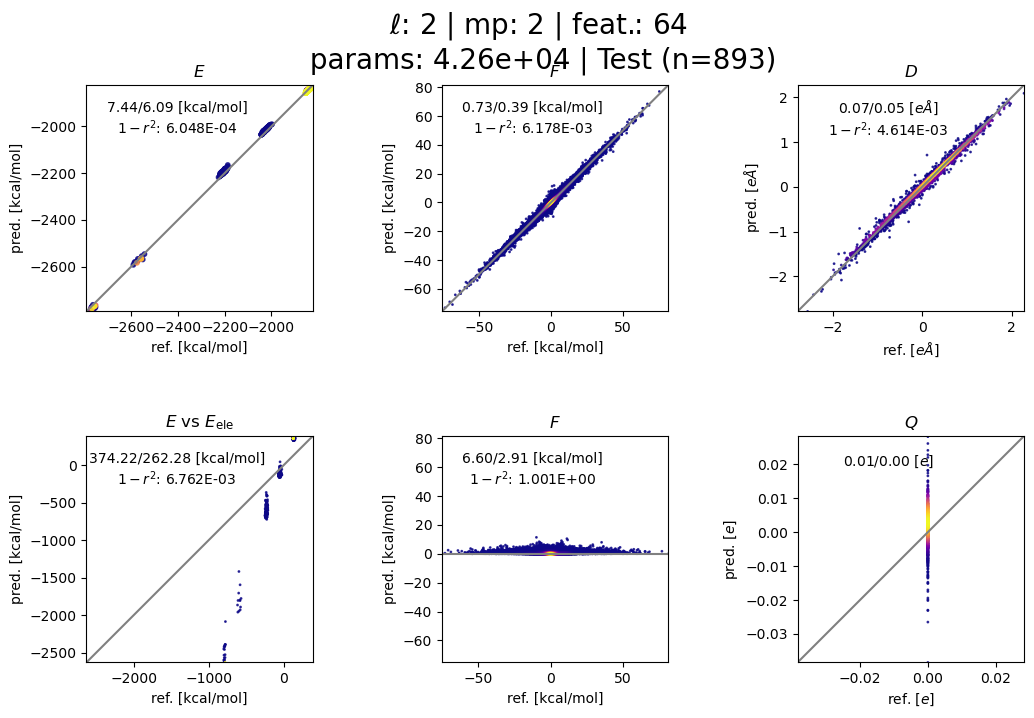

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 0
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.10s/it]

predF.shape (5217,)


2it [00:02,  1.10s/it]

predF.shape (5217,)


3it [00:03,  1.10s/it]

predF.shape (5217,)


4it [00:04,  1.10s/it]

predF.shape (5217,)


5it [00:05,  1.10s/it]

predF.shape (5217,)


6it [00:06,  1.10s/it]

predF.shape (5217,)


7it [00:07,  1.10s/it]

predF.shape (5217,)


8it [00:08,  1.10s/it]

predF.shape (5217,)


9it [00:09,  1.10s/it]

predF.shape (5217,)


10it [00:10,  1.10s/it]

predF.shape (5217,)


11it [00:12,  1.10s/it]

predF.shape (5217,)


12it [00:13,  1.10s/it]

predF.shape (5217,)


13it [00:14,  1.10s/it]

predF.shape (5217,)


14it [00:15,  1.10s/it]

predF.shape (5217,)


15it [00:16,  1.10s/it]

predF.shape (5217,)


16it [00:17,  1.10s/it]

predF.shape (5217,)


17it [00:18,  1.10s/it]

predF.shape (5217,)


18it [00:19,  1.10s/it]

predF.shape (5217,)


19it [00:20,  1.10s/it]

predF.shape (5217,)


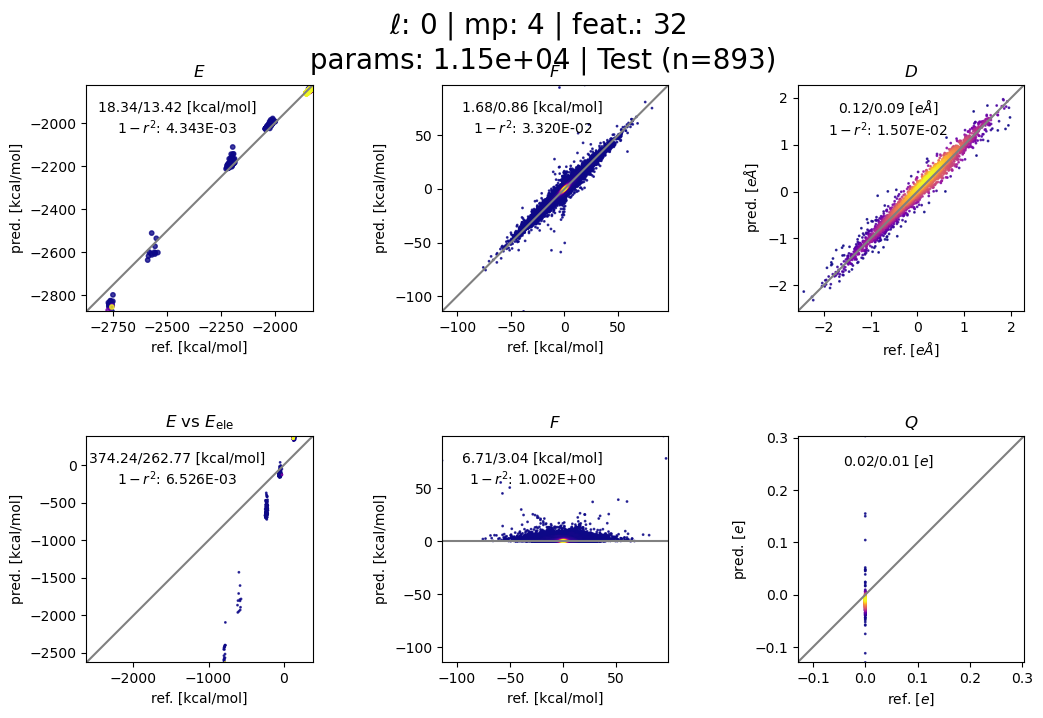

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 0
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.57it/s]

predF.shape (5217,)


2it [00:01,  1.57it/s]

predF.shape (5217,)


3it [00:01,  1.58it/s]

predF.shape (5217,)


4it [00:02,  1.58it/s]

predF.shape (5217,)


5it [00:03,  1.58it/s]

predF.shape (5217,)


6it [00:03,  1.58it/s]

predF.shape (5217,)


7it [00:04,  1.58it/s]

predF.shape (5217,)


8it [00:05,  1.58it/s]

predF.shape (5217,)


9it [00:05,  1.58it/s]

predF.shape (5217,)


10it [00:06,  1.58it/s]

predF.shape (5217,)


11it [00:06,  1.58it/s]

predF.shape (5217,)


12it [00:07,  1.58it/s]

predF.shape (5217,)


13it [00:08,  1.58it/s]

predF.shape (5217,)


14it [00:08,  1.58it/s]

predF.shape (5217,)


15it [00:09,  1.58it/s]

predF.shape (5217,)


16it [00:10,  1.58it/s]

predF.shape (5217,)


17it [00:10,  1.58it/s]

predF.shape (5217,)


18it [00:11,  1.58it/s]

predF.shape (5217,)


19it [00:12,  1.58it/s]

predF.shape (5217,)


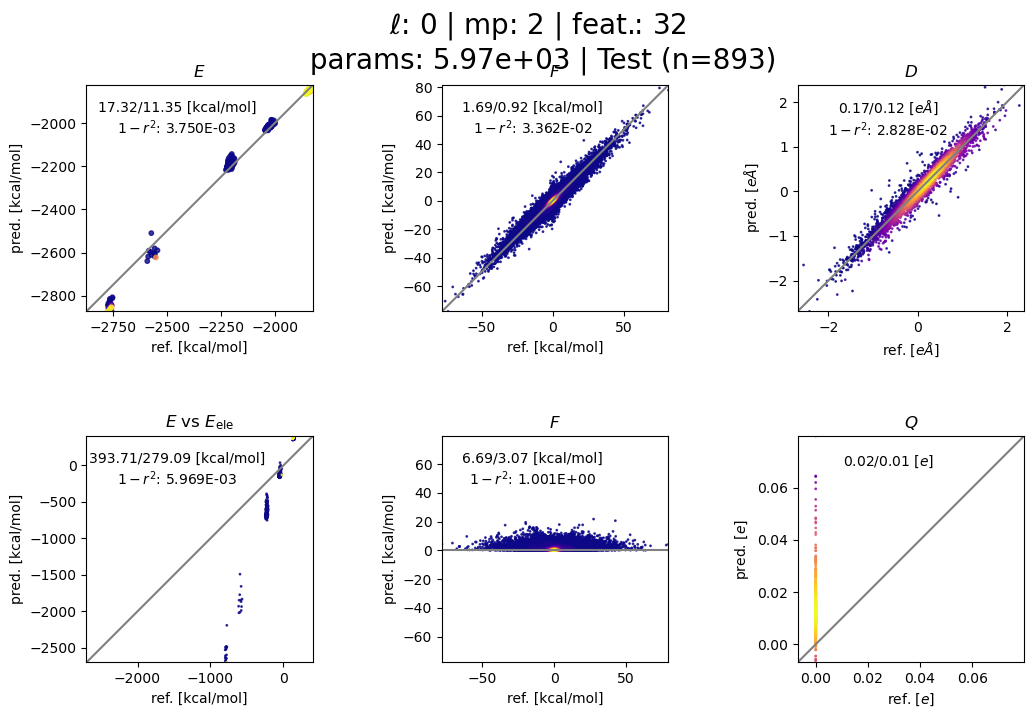

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 2
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:08,  8.59s/it]

predF.shape (5217,)


2it [00:10,  4.75s/it]

predF.shape (5217,)


3it [00:12,  3.52s/it]

predF.shape (5217,)


4it [00:14,  2.95s/it]

predF.shape (5217,)


5it [00:16,  2.63s/it]

predF.shape (5217,)


6it [00:18,  2.44s/it]

predF.shape (5217,)


7it [00:20,  2.31s/it]

predF.shape (5217,)


8it [00:23,  2.23s/it]

predF.shape (5217,)


9it [00:25,  2.18s/it]

predF.shape (5217,)


10it [00:27,  2.15s/it]

predF.shape (5217,)


11it [00:29,  2.12s/it]

predF.shape (5217,)


12it [00:31,  2.10s/it]

predF.shape (5217,)


13it [00:33,  2.09s/it]

predF.shape (5217,)


14it [00:35,  2.08s/it]

predF.shape (5217,)


15it [00:37,  2.08s/it]

predF.shape (5217,)


16it [00:39,  2.07s/it]

predF.shape (5217,)


17it [00:42,  2.26s/it]

predF.shape (5217,)


18it [00:44,  2.20s/it]

predF.shape (5217,)


19it [00:46,  2.44s/it]

predF.shape (5217,)


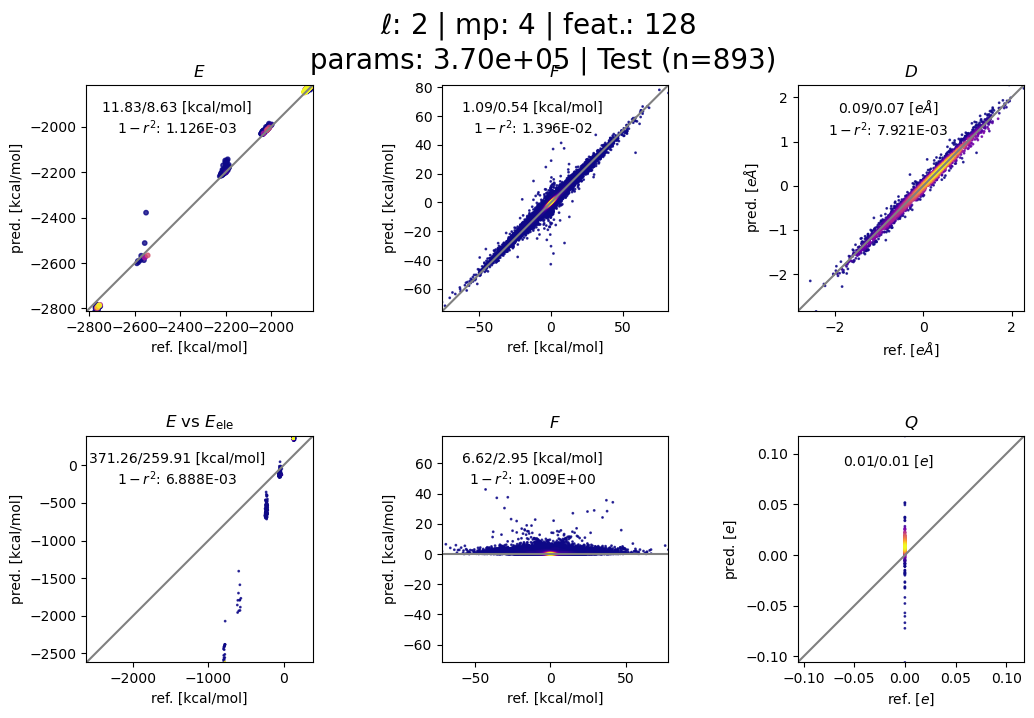

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 2
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.08it/s]

predF.shape (5217,)


2it [00:01,  1.08it/s]

predF.shape (5217,)


3it [00:02,  1.09it/s]

predF.shape (5217,)


4it [00:03,  1.09it/s]

predF.shape (5217,)


5it [00:04,  1.09it/s]

predF.shape (5217,)


6it [00:05,  1.09it/s]

predF.shape (5217,)


7it [00:06,  1.09it/s]

predF.shape (5217,)


8it [00:07,  1.09it/s]

predF.shape (5217,)


9it [00:08,  1.09it/s]

predF.shape (5217,)


10it [00:09,  1.09it/s]

predF.shape (5217,)


11it [00:10,  1.09it/s]

predF.shape (5217,)


12it [00:11,  1.09it/s]

predF.shape (5217,)


13it [00:11,  1.09it/s]

predF.shape (5217,)


14it [00:12,  1.09it/s]

predF.shape (5217,)


15it [00:13,  1.09it/s]

predF.shape (5217,)


16it [00:14,  1.09it/s]

predF.shape (5217,)


17it [00:15,  1.09it/s]

predF.shape (5217,)


18it [00:16,  1.09it/s]

predF.shape (5217,)


19it [00:17,  1.09it/s]

predF.shape (5217,)


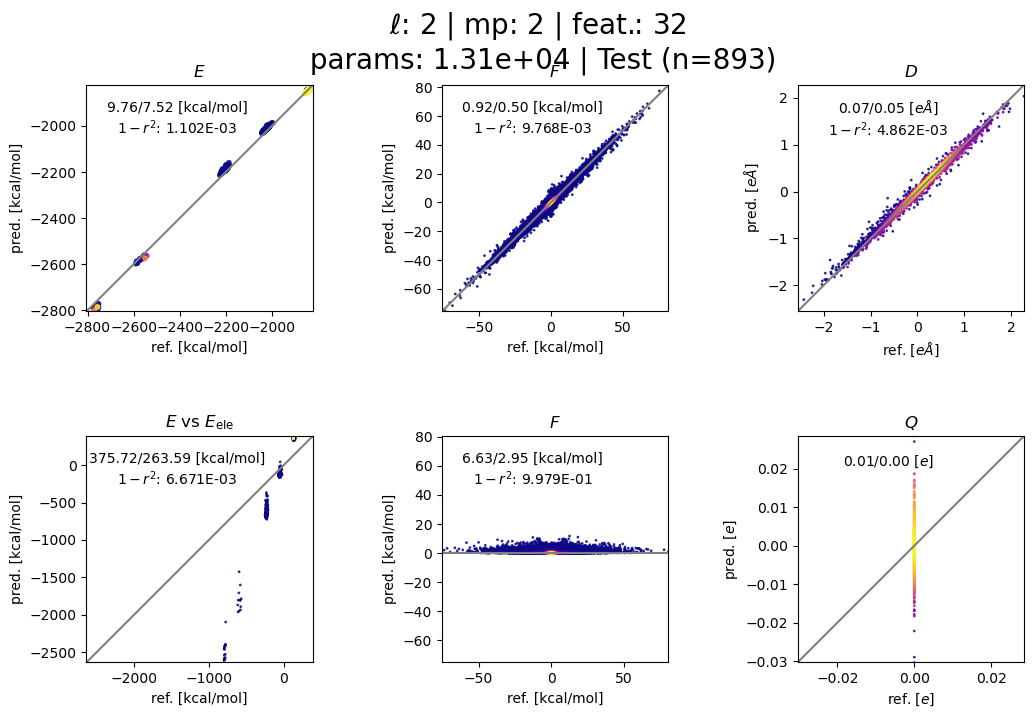

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 1
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.31it/s]

predF.shape (5217,)


2it [00:01,  1.31it/s]

predF.shape (5217,)


3it [00:02,  1.31it/s]

predF.shape (5217,)


4it [00:03,  1.31it/s]

predF.shape (5217,)


5it [00:03,  1.31it/s]

predF.shape (5217,)


6it [00:04,  1.31it/s]

predF.shape (5217,)


7it [00:05,  1.31it/s]

predF.shape (5217,)


8it [00:06,  1.31it/s]

predF.shape (5217,)


9it [00:06,  1.31it/s]

predF.shape (5217,)


10it [00:07,  1.31it/s]

predF.shape (5217,)


11it [00:08,  1.31it/s]

predF.shape (5217,)


12it [00:09,  1.31it/s]

predF.shape (5217,)


13it [00:09,  1.31it/s]

predF.shape (5217,)


14it [00:10,  1.31it/s]

predF.shape (5217,)


15it [00:11,  1.31it/s]

predF.shape (5217,)


16it [00:12,  1.31it/s]

predF.shape (5217,)


17it [00:12,  1.31it/s]

predF.shape (5217,)


18it [00:13,  1.31it/s]

predF.shape (5217,)


19it [00:14,  1.31it/s]

predF.shape (5217,)


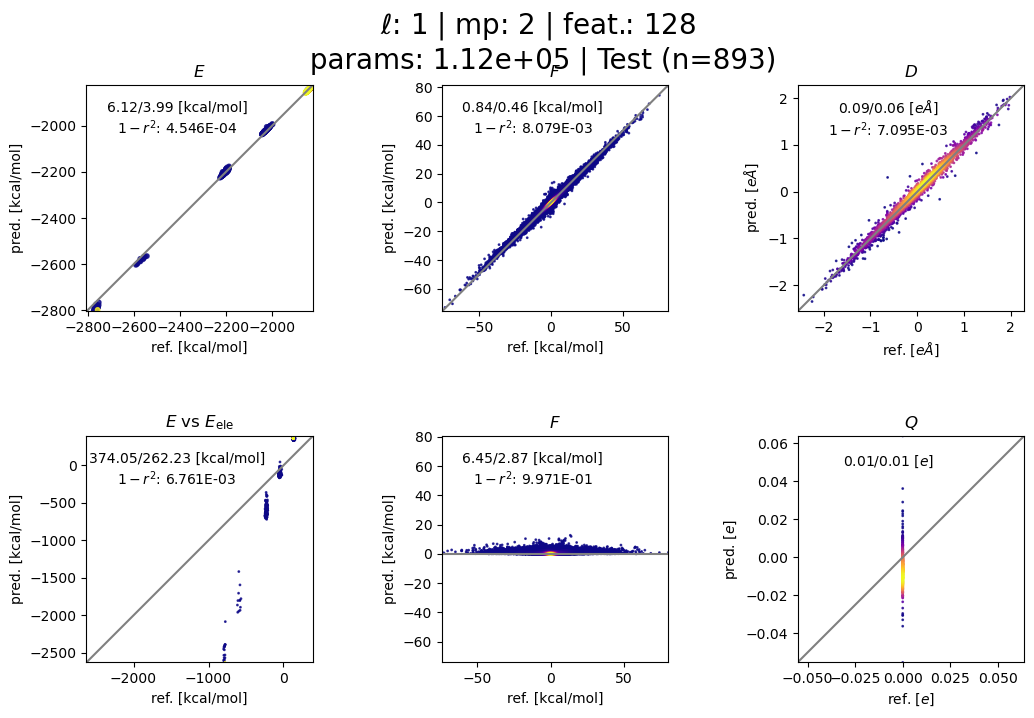

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 2
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:05,  5.02s/it]

predF.shape (5217,)


2it [00:07,  3.66s/it]

predF.shape (5217,)


3it [00:09,  2.91s/it]

predF.shape (5217,)


4it [00:11,  2.56s/it]

predF.shape (5217,)


5it [00:13,  2.37s/it]

predF.shape (5217,)


6it [00:15,  2.25s/it]

predF.shape (5217,)


7it [00:17,  2.18s/it]

predF.shape (5217,)


8it [00:19,  2.13s/it]

predF.shape (5217,)


9it [00:21,  2.10s/it]

predF.shape (5217,)


10it [00:23,  2.08s/it]

predF.shape (5217,)


11it [00:25,  2.06s/it]

predF.shape (5217,)


12it [00:28,  2.05s/it]

predF.shape (5217,)


13it [00:30,  2.05s/it]

predF.shape (5217,)


14it [00:32,  2.04s/it]

predF.shape (5217,)


15it [00:34,  2.04s/it]

predF.shape (5217,)


16it [00:36,  2.03s/it]

predF.shape (5217,)


17it [00:38,  2.23s/it]

predF.shape (5217,)


18it [00:40,  2.17s/it]

predF.shape (5217,)


19it [00:42,  2.26s/it]

predF.shape (5217,)


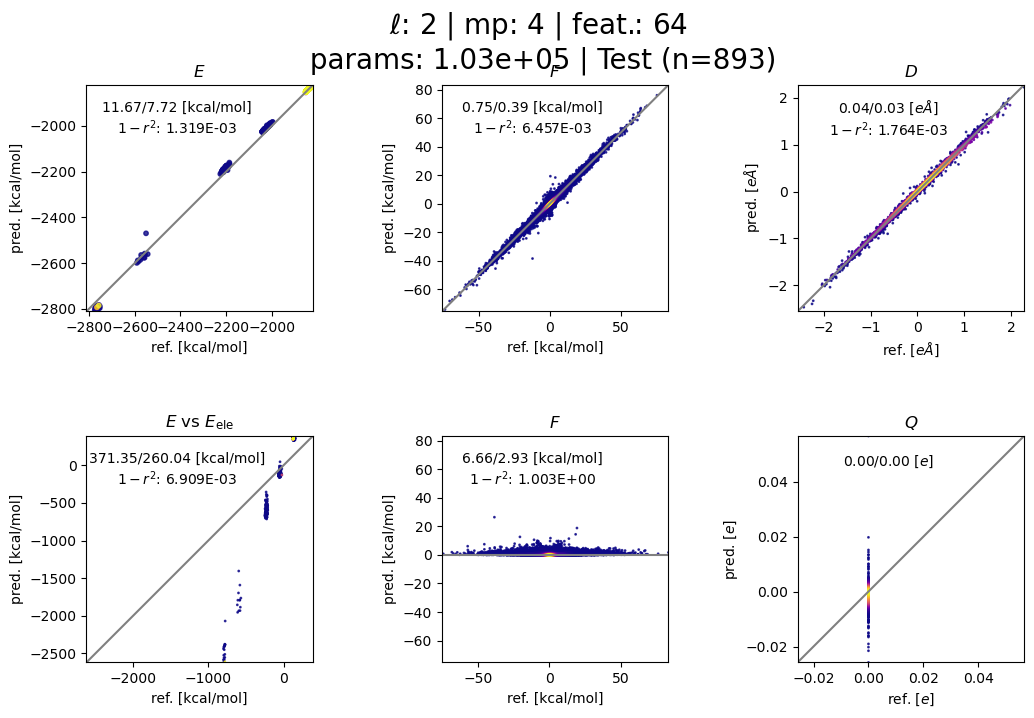

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 2
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:04,  4.99s/it]

predF.shape (5217,)


2it [00:07,  3.25s/it]

predF.shape (5217,)


3it [00:09,  2.69s/it]

predF.shape (5217,)


4it [00:11,  2.43s/it]

predF.shape (5217,)


5it [00:13,  2.28s/it]

predF.shape (5217,)


6it [00:15,  2.19s/it]

predF.shape (5217,)


7it [00:17,  2.13s/it]

predF.shape (5217,)


8it [00:19,  2.10s/it]

predF.shape (5217,)


9it [00:21,  2.08s/it]

predF.shape (5217,)


10it [00:23,  2.06s/it]

predF.shape (5217,)


11it [00:25,  2.05s/it]

predF.shape (5217,)


12it [00:27,  2.24s/it]

predF.shape (5217,)


13it [00:29,  2.18s/it]

predF.shape (5217,)


14it [00:31,  2.13s/it]

predF.shape (5217,)


15it [00:34,  2.11s/it]

predF.shape (5217,)


16it [00:36,  2.08s/it]

predF.shape (5217,)


17it [00:38,  2.07s/it]

predF.shape (5217,)


18it [00:40,  2.06s/it]

predF.shape (5217,)


19it [00:42,  2.22s/it]

predF.shape (5217,)


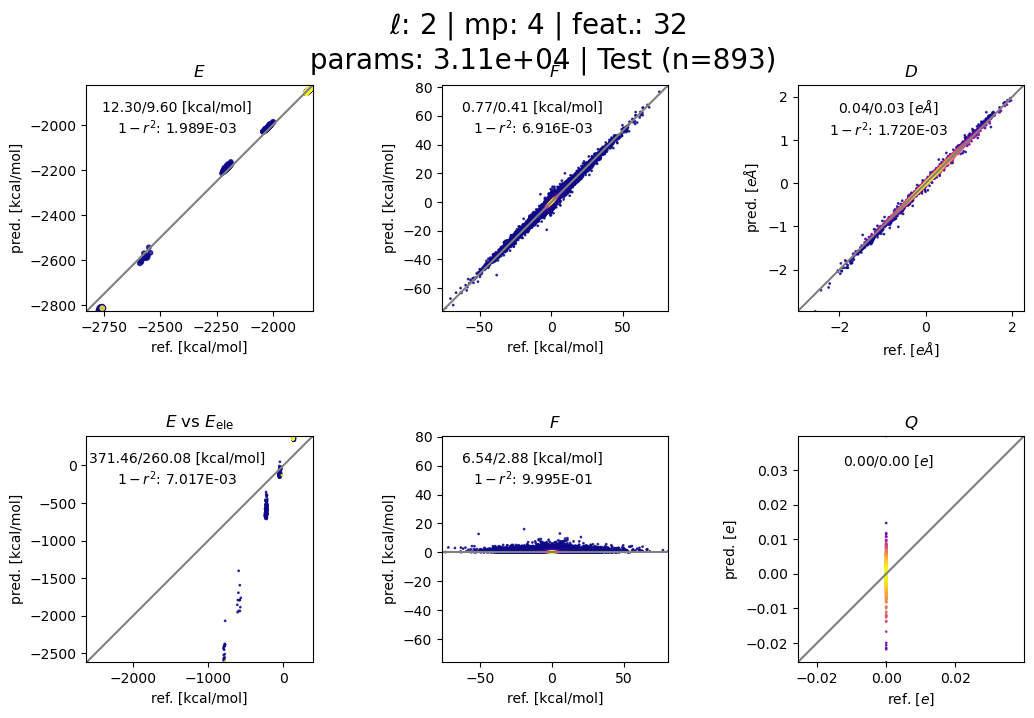

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 1
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:02,  2.61s/it]

predF.shape (5217,)


2it [00:04,  1.93s/it]

predF.shape (5217,)


3it [00:05,  1.71s/it]

predF.shape (5217,)


4it [00:06,  1.61s/it]

predF.shape (5217,)


5it [00:08,  1.55s/it]

predF.shape (5217,)


6it [00:09,  1.52s/it]

predF.shape (5217,)


7it [00:11,  1.49s/it]

predF.shape (5217,)


8it [00:12,  1.48s/it]

predF.shape (5217,)


9it [00:14,  1.47s/it]

predF.shape (5217,)


10it [00:15,  1.46s/it]

predF.shape (5217,)


11it [00:17,  1.46s/it]

predF.shape (5217,)


12it [00:18,  1.46s/it]

predF.shape (5217,)


13it [00:20,  1.45s/it]

predF.shape (5217,)


14it [00:21,  1.45s/it]

predF.shape (5217,)


15it [00:22,  1.45s/it]

predF.shape (5217,)


16it [00:24,  1.45s/it]

predF.shape (5217,)


17it [00:26,  1.65s/it]

predF.shape (5217,)


18it [00:27,  1.59s/it]

predF.shape (5217,)


19it [00:29,  1.55s/it]

predF.shape (5217,)


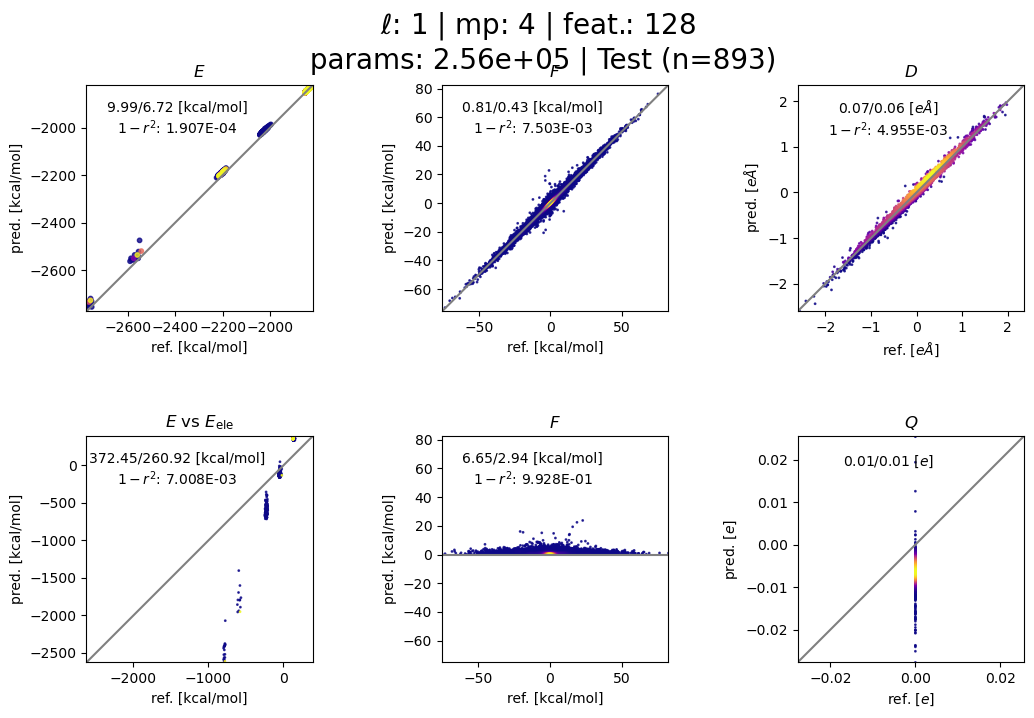

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 1
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:02,  2.39s/it]

predF.shape (5217,)


2it [00:03,  1.84s/it]

predF.shape (5217,)


3it [00:05,  1.66s/it]

predF.shape (5217,)


4it [00:06,  1.57s/it]

predF.shape (5217,)


5it [00:08,  1.53s/it]

predF.shape (5217,)


6it [00:09,  1.50s/it]

predF.shape (5217,)


7it [00:11,  1.48s/it]

predF.shape (5217,)


8it [00:12,  1.47s/it]

predF.shape (5217,)


9it [00:13,  1.46s/it]

predF.shape (5217,)


10it [00:15,  1.46s/it]

predF.shape (5217,)


11it [00:16,  1.46s/it]

predF.shape (5217,)


12it [00:18,  1.45s/it]

predF.shape (5217,)


13it [00:19,  1.45s/it]

predF.shape (5217,)


14it [00:21,  1.45s/it]

predF.shape (5217,)


15it [00:22,  1.45s/it]

predF.shape (5217,)


16it [00:24,  1.45s/it]

predF.shape (5217,)


17it [00:25,  1.45s/it]

predF.shape (5217,)


18it [00:27,  1.45s/it]

predF.shape (5217,)


19it [00:28,  1.50s/it]

predF.shape (5217,)


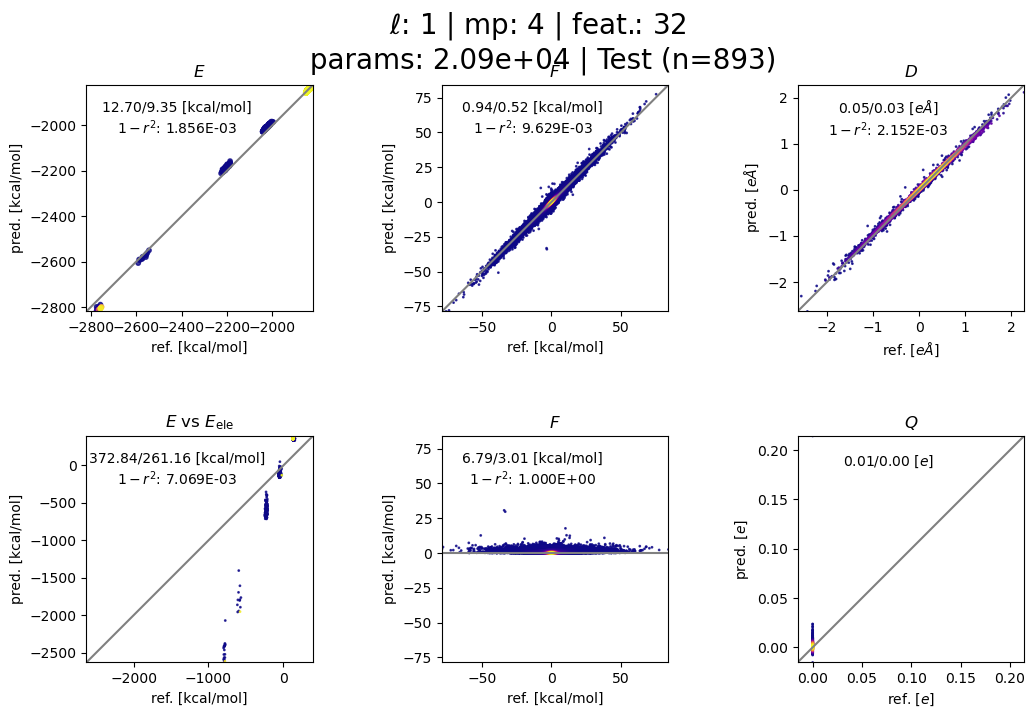

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 2
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:02,  2.03s/it]

predF.shape (5217,)


2it [00:04,  2.03s/it]

predF.shape (5217,)


3it [00:06,  2.03s/it]

predF.shape (5217,)


4it [00:08,  2.29s/it]

predF.shape (5217,)


5it [00:10,  2.20s/it]

predF.shape (5217,)


6it [00:12,  2.14s/it]

predF.shape (5217,)


7it [00:14,  2.10s/it]

predF.shape (5217,)


8it [00:16,  2.08s/it]

predF.shape (5217,)


9it [00:18,  2.07s/it]

predF.shape (5217,)


10it [00:20,  2.06s/it]

predF.shape (5217,)


11it [00:23,  2.05s/it]

predF.shape (5217,)


12it [00:25,  2.04s/it]

predF.shape (5217,)


13it [00:27,  2.04s/it]

predF.shape (5217,)


14it [00:29,  2.04s/it]

predF.shape (5217,)


15it [00:31,  2.03s/it]

predF.shape (5217,)


16it [00:33,  2.03s/it]

predF.shape (5217,)


17it [00:35,  2.03s/it]

predF.shape (5217,)


18it [00:37,  2.03s/it]

predF.shape (5217,)


19it [00:39,  2.06s/it]

predF.shape (5217,)


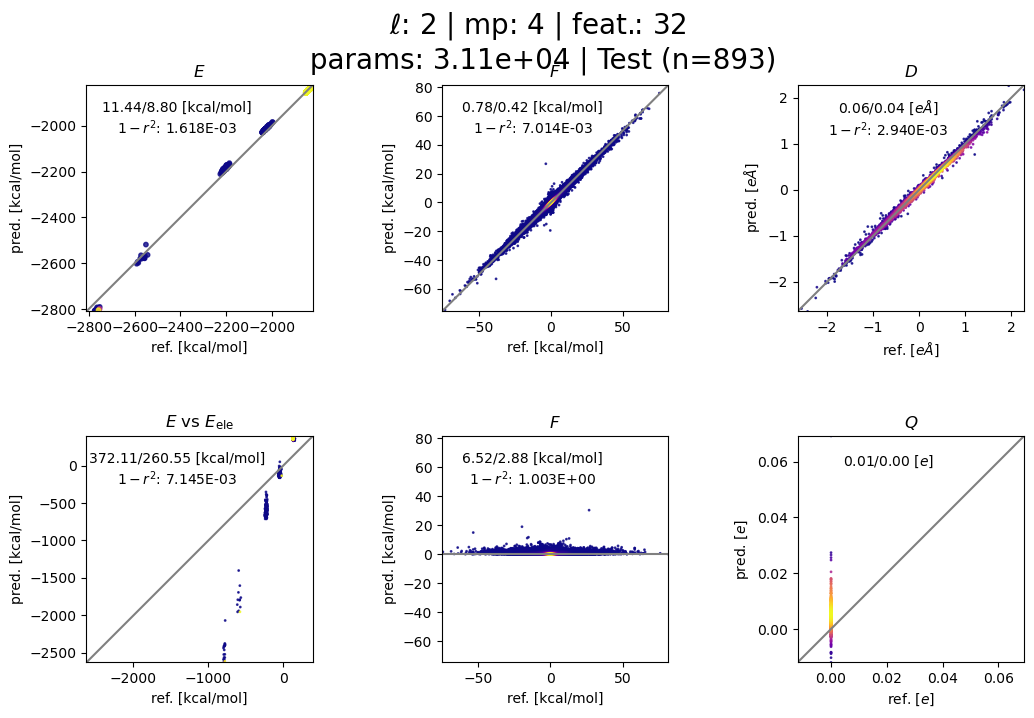

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 2
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.08it/s]

predF.shape (5217,)


2it [00:01,  1.08it/s]

predF.shape (5217,)


3it [00:02,  1.09it/s]

predF.shape (5217,)


4it [00:03,  1.09it/s]

predF.shape (5217,)


5it [00:04,  1.09it/s]

predF.shape (5217,)


6it [00:05,  1.09it/s]

predF.shape (5217,)


7it [00:06,  1.09it/s]

predF.shape (5217,)


8it [00:07,  1.09it/s]

predF.shape (5217,)


9it [00:08,  1.09it/s]

predF.shape (5217,)


10it [00:09,  1.09it/s]

predF.shape (5217,)


11it [00:10,  1.09it/s]

predF.shape (5217,)


12it [00:11,  1.09it/s]

predF.shape (5217,)


13it [00:11,  1.09it/s]

predF.shape (5217,)


14it [00:12,  1.09it/s]

predF.shape (5217,)


15it [00:13,  1.09it/s]

predF.shape (5217,)


16it [00:14,  1.09it/s]

predF.shape (5217,)


17it [00:15,  1.09it/s]

predF.shape (5217,)


18it [00:16,  1.09it/s]

predF.shape (5217,)


19it [00:17,  1.09it/s]

predF.shape (5217,)


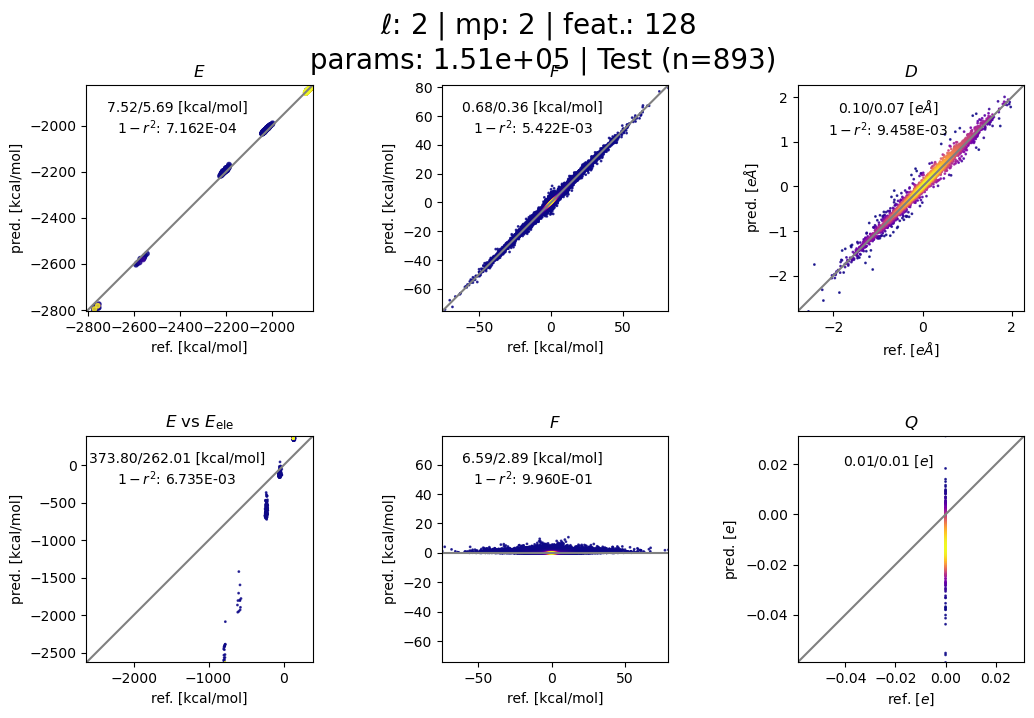

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 0
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.10s/it]

predF.shape (5217,)


2it [00:02,  1.10s/it]

predF.shape (5217,)


3it [00:03,  1.10s/it]

predF.shape (5217,)


4it [00:04,  1.10s/it]

predF.shape (5217,)


5it [00:05,  1.10s/it]

predF.shape (5217,)


6it [00:06,  1.10s/it]

predF.shape (5217,)


7it [00:07,  1.10s/it]

predF.shape (5217,)


8it [00:08,  1.10s/it]

predF.shape (5217,)


9it [00:09,  1.10s/it]

predF.shape (5217,)


10it [00:11,  1.10s/it]

predF.shape (5217,)


11it [00:12,  1.10s/it]

predF.shape (5217,)


12it [00:13,  1.10s/it]

predF.shape (5217,)


13it [00:14,  1.10s/it]

predF.shape (5217,)


14it [00:15,  1.10s/it]

predF.shape (5217,)


15it [00:16,  1.10s/it]

predF.shape (5217,)


16it [00:17,  1.10s/it]

predF.shape (5217,)


17it [00:18,  1.10s/it]

predF.shape (5217,)


18it [00:19,  1.10s/it]

predF.shape (5217,)


19it [00:20,  1.10s/it]

predF.shape (5217,)


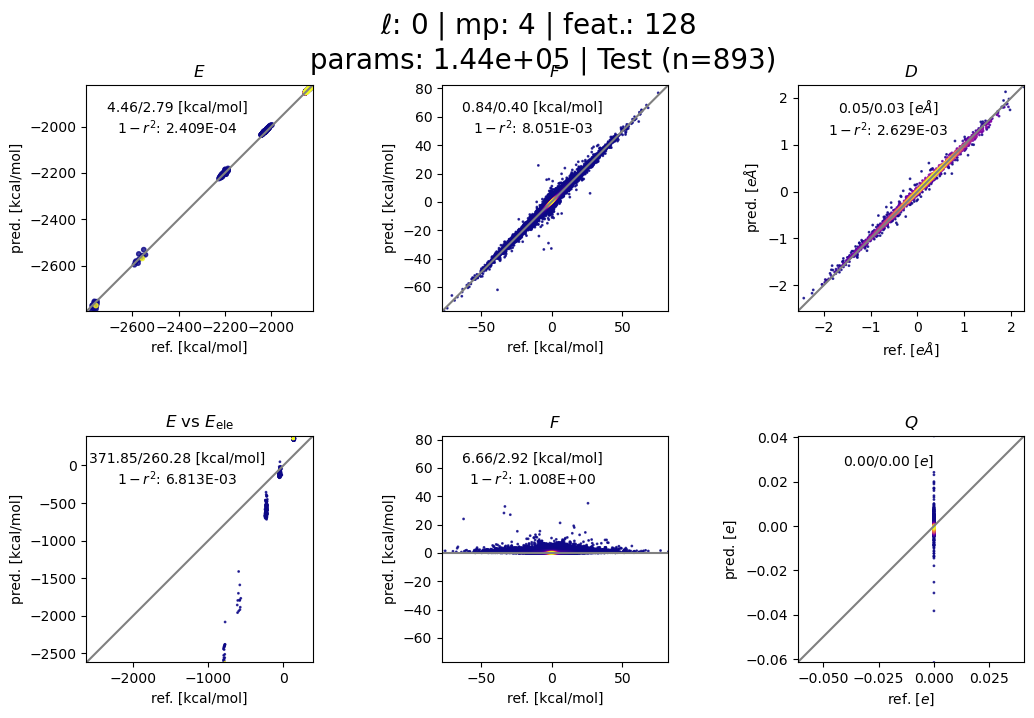

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 2
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.09it/s]

predF.shape (5217,)


2it [00:01,  1.09it/s]

predF.shape (5217,)


3it [00:02,  1.09it/s]

predF.shape (5217,)


4it [00:03,  1.09it/s]

predF.shape (5217,)


5it [00:04,  1.09it/s]

predF.shape (5217,)


6it [00:05,  1.09it/s]

predF.shape (5217,)


7it [00:06,  1.09it/s]

predF.shape (5217,)


8it [00:07,  1.09it/s]

predF.shape (5217,)


9it [00:08,  1.09it/s]

predF.shape (5217,)


10it [00:09,  1.09it/s]

predF.shape (5217,)


11it [00:10,  1.09it/s]

predF.shape (5217,)


12it [00:10,  1.09it/s]

predF.shape (5217,)


13it [00:11,  1.09it/s]

predF.shape (5217,)


14it [00:12,  1.09it/s]

predF.shape (5217,)


15it [00:13,  1.09it/s]

predF.shape (5217,)


16it [00:14,  1.09it/s]

predF.shape (5217,)


17it [00:15,  1.09it/s]

predF.shape (5217,)


18it [00:17,  1.12s/it]

predF.shape (5217,)


19it [00:18,  1.05it/s]

predF.shape (5217,)


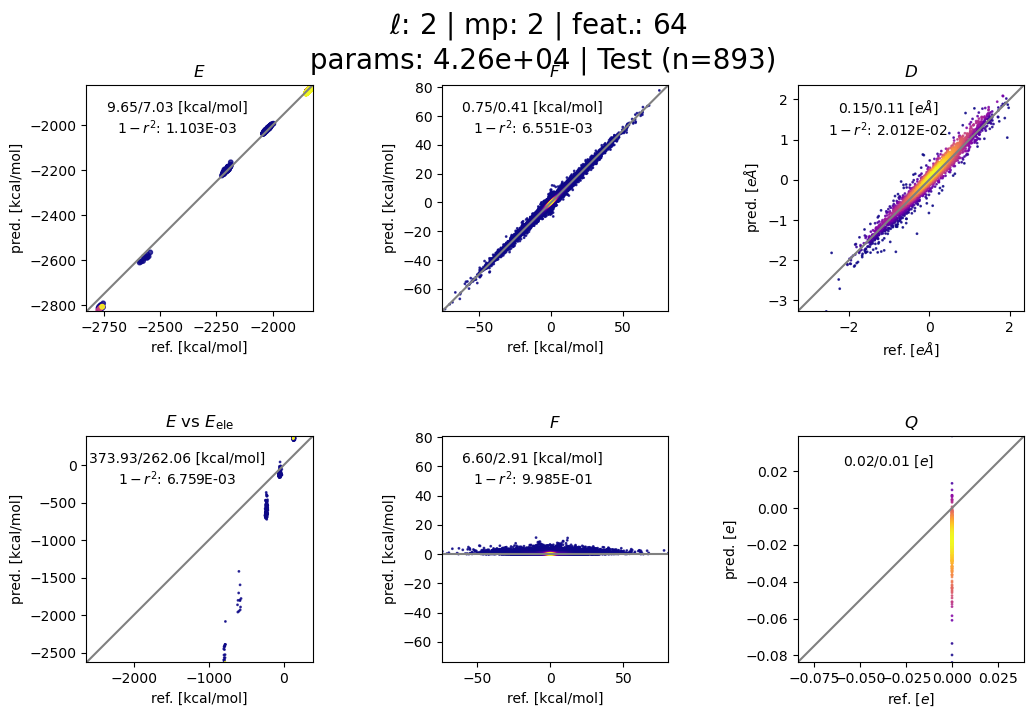

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 0
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.57it/s]

predF.shape (5217,)


2it [00:01,  1.57it/s]

predF.shape (5217,)


3it [00:01,  1.57it/s]

predF.shape (5217,)


4it [00:02,  1.57it/s]

predF.shape (5217,)


5it [00:03,  1.57it/s]

predF.shape (5217,)


6it [00:03,  1.57it/s]

predF.shape (5217,)


7it [00:04,  1.57it/s]

predF.shape (5217,)


8it [00:05,  1.57it/s]

predF.shape (5217,)


9it [00:05,  1.57it/s]

predF.shape (5217,)


10it [00:06,  1.57it/s]

predF.shape (5217,)


11it [00:07,  1.57it/s]

predF.shape (5217,)


12it [00:07,  1.57it/s]

predF.shape (5217,)


13it [00:08,  1.57it/s]

predF.shape (5217,)


14it [00:08,  1.57it/s]

predF.shape (5217,)


15it [00:09,  1.57it/s]

predF.shape (5217,)


16it [00:10,  1.57it/s]

predF.shape (5217,)


17it [00:10,  1.57it/s]

predF.shape (5217,)


18it [00:11,  1.57it/s]

predF.shape (5217,)


19it [00:12,  1.57it/s]

predF.shape (5217,)


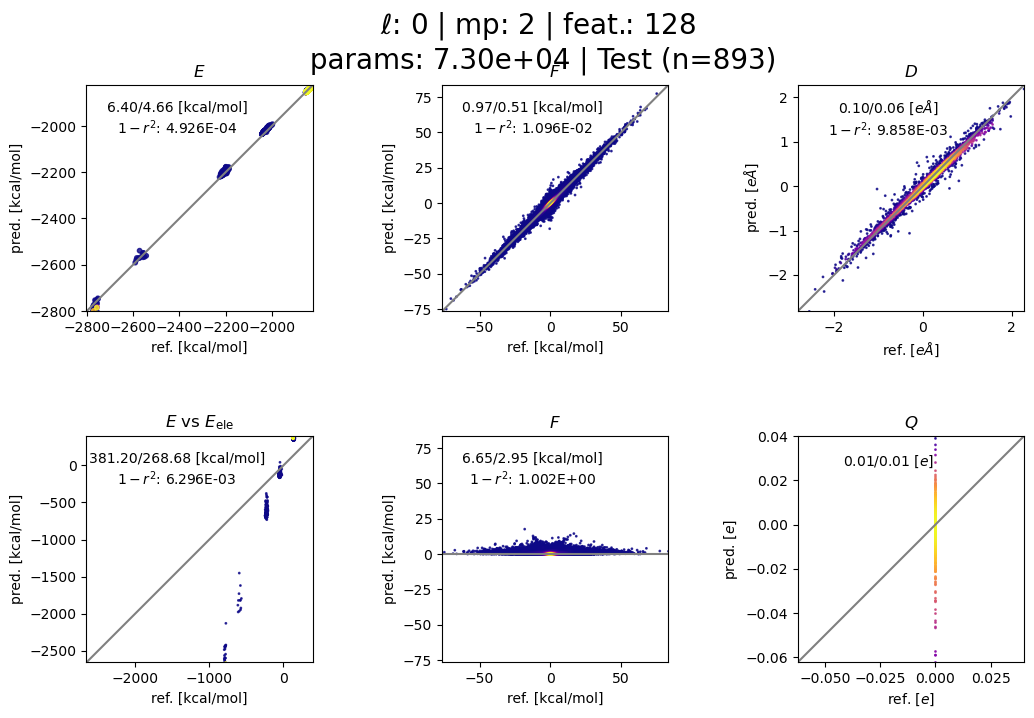

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 1
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.45s/it]

predF.shape (5217,)


2it [00:02,  1.45s/it]

predF.shape (5217,)


3it [00:04,  1.45s/it]

predF.shape (5217,)


4it [00:05,  1.45s/it]

predF.shape (5217,)


5it [00:07,  1.45s/it]

predF.shape (5217,)


6it [00:08,  1.45s/it]

predF.shape (5217,)


7it [00:10,  1.45s/it]

predF.shape (5217,)


8it [00:11,  1.45s/it]

predF.shape (5217,)


9it [00:13,  1.45s/it]

predF.shape (5217,)


10it [00:14,  1.45s/it]

predF.shape (5217,)


11it [00:15,  1.45s/it]

predF.shape (5217,)


12it [00:17,  1.45s/it]

predF.shape (5217,)


13it [00:18,  1.45s/it]

predF.shape (5217,)


14it [00:20,  1.45s/it]

predF.shape (5217,)


15it [00:21,  1.45s/it]

predF.shape (5217,)


16it [00:23,  1.45s/it]

predF.shape (5217,)


17it [00:24,  1.45s/it]

predF.shape (5217,)


18it [00:26,  1.45s/it]

predF.shape (5217,)


19it [00:27,  1.45s/it]

predF.shape (5217,)


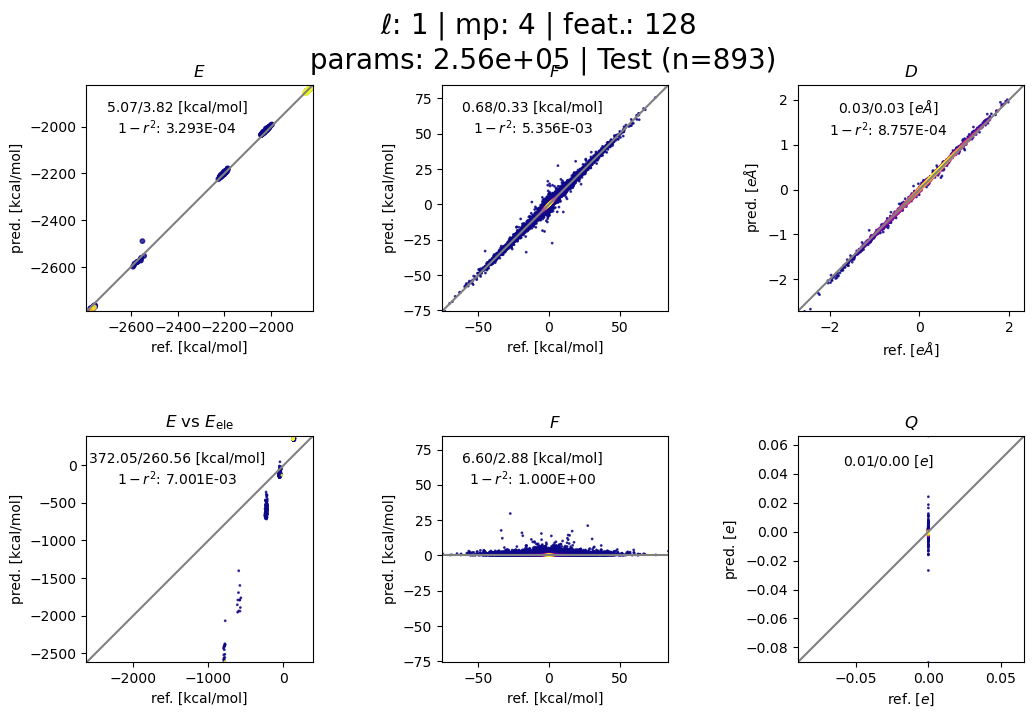

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 2
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:02,  2.02s/it]

predF.shape (5217,)


2it [00:04,  2.42s/it]

predF.shape (5217,)


3it [00:06,  2.24s/it]

predF.shape (5217,)


4it [00:08,  2.15s/it]

predF.shape (5217,)


5it [00:10,  2.11s/it]

predF.shape (5217,)


6it [00:12,  2.08s/it]

predF.shape (5217,)


7it [00:14,  2.06s/it]

predF.shape (5217,)


8it [00:16,  2.05s/it]

predF.shape (5217,)


9it [00:18,  2.04s/it]

predF.shape (5217,)


10it [00:20,  2.03s/it]

predF.shape (5217,)


11it [00:22,  2.03s/it]

predF.shape (5217,)


12it [00:24,  2.03s/it]

predF.shape (5217,)


13it [00:26,  2.03s/it]

predF.shape (5217,)


14it [00:28,  2.03s/it]

predF.shape (5217,)


15it [00:31,  2.03s/it]

predF.shape (5217,)


16it [00:33,  2.02s/it]

predF.shape (5217,)


17it [00:35,  2.02s/it]

predF.shape (5217,)


18it [00:37,  2.22s/it]

predF.shape (5217,)


19it [00:39,  2.09s/it]

predF.shape (5217,)


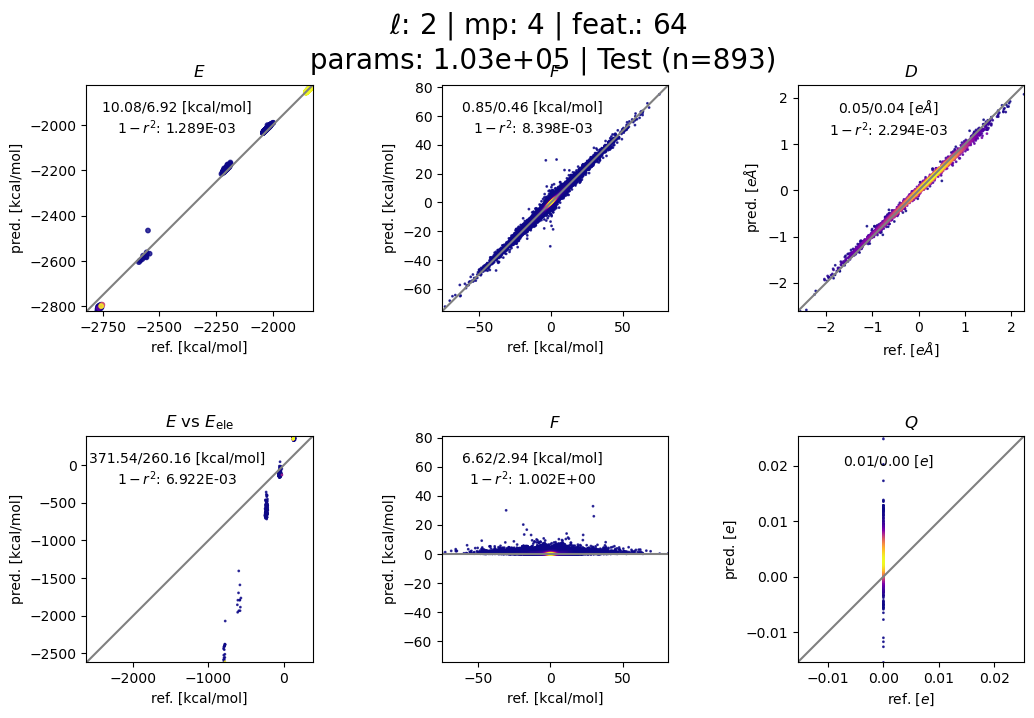

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 1
    num_iterations = 2
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:00,  1.31it/s]

predF.shape (5217,)


2it [00:01,  1.31it/s]

predF.shape (5217,)


3it [00:02,  1.31it/s]

predF.shape (5217,)


4it [00:03,  1.31it/s]

predF.shape (5217,)


5it [00:03,  1.31it/s]

predF.shape (5217,)


6it [00:04,  1.31it/s]

predF.shape (5217,)


7it [00:05,  1.31it/s]

predF.shape (5217,)


8it [00:06,  1.31it/s]

predF.shape (5217,)


9it [00:06,  1.31it/s]

predF.shape (5217,)


10it [00:07,  1.31it/s]

predF.shape (5217,)


11it [00:08,  1.31it/s]

predF.shape (5217,)


12it [00:09,  1.31it/s]

predF.shape (5217,)


13it [00:09,  1.31it/s]

predF.shape (5217,)


14it [00:10,  1.31it/s]

predF.shape (5217,)


15it [00:11,  1.31it/s]

predF.shape (5217,)


16it [00:12,  1.31it/s]

predF.shape (5217,)


17it [00:12,  1.31it/s]

predF.shape (5217,)


18it [00:13,  1.31it/s]

predF.shape (5217,)


19it [00:14,  1.31it/s]

predF.shape (5217,)


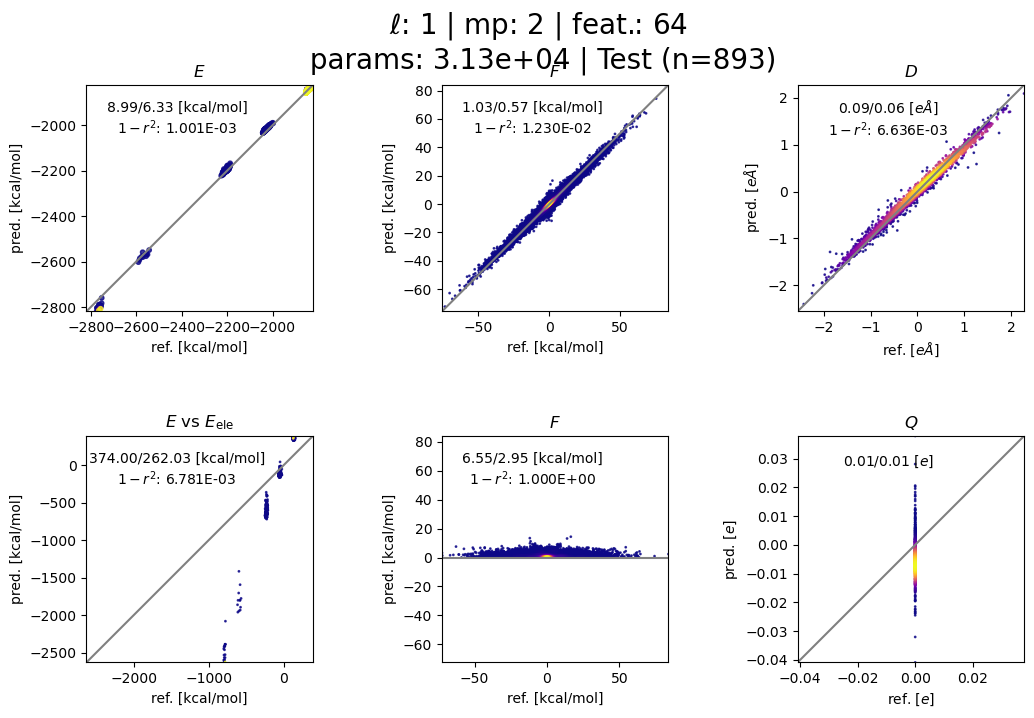

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 1
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.45s/it]

predF.shape (5217,)


2it [00:02,  1.45s/it]

predF.shape (5217,)


3it [00:04,  1.45s/it]

predF.shape (5217,)


4it [00:05,  1.45s/it]

predF.shape (5217,)


5it [00:07,  1.45s/it]

predF.shape (5217,)


6it [00:08,  1.45s/it]

predF.shape (5217,)


7it [00:10,  1.46s/it]

predF.shape (5217,)


8it [00:11,  1.46s/it]

predF.shape (5217,)


9it [00:13,  1.45s/it]

predF.shape (5217,)


10it [00:14,  1.45s/it]

predF.shape (5217,)


11it [00:15,  1.45s/it]

predF.shape (5217,)


12it [00:17,  1.45s/it]

predF.shape (5217,)


13it [00:18,  1.45s/it]

predF.shape (5217,)


14it [00:20,  1.45s/it]

predF.shape (5217,)


15it [00:21,  1.45s/it]

predF.shape (5217,)


16it [00:23,  1.45s/it]

predF.shape (5217,)


17it [00:24,  1.45s/it]

predF.shape (5217,)


18it [00:26,  1.45s/it]

predF.shape (5217,)


19it [00:27,  1.45s/it]

predF.shape (5217,)


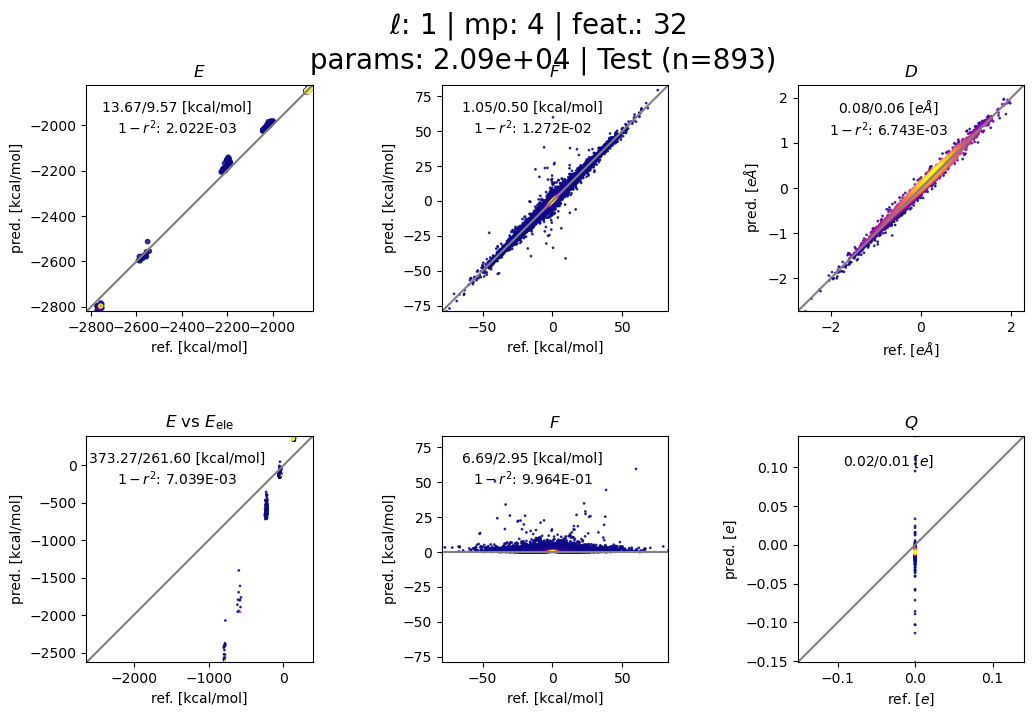

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 32
    max_degree = 0
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.10s/it]

predF.shape (5217,)


2it [00:02,  1.10s/it]

predF.shape (5217,)


3it [00:03,  1.10s/it]

predF.shape (5217,)


4it [00:05,  1.37s/it]

predF.shape (5217,)


5it [00:06,  1.27s/it]

predF.shape (5217,)


6it [00:07,  1.21s/it]

predF.shape (5217,)


7it [00:08,  1.18s/it]

predF.shape (5217,)


8it [00:09,  1.15s/it]

predF.shape (5217,)


9it [00:10,  1.14s/it]

predF.shape (5217,)


10it [00:11,  1.13s/it]

predF.shape (5217,)


11it [00:12,  1.12s/it]

predF.shape (5217,)


12it [00:13,  1.11s/it]

predF.shape (5217,)


13it [00:14,  1.11s/it]

predF.shape (5217,)


14it [00:16,  1.11s/it]

predF.shape (5217,)


15it [00:17,  1.10s/it]

predF.shape (5217,)


16it [00:18,  1.10s/it]

predF.shape (5217,)


17it [00:19,  1.10s/it]

predF.shape (5217,)


18it [00:20,  1.10s/it]

predF.shape (5217,)


19it [00:21,  1.14s/it]

predF.shape (5217,)


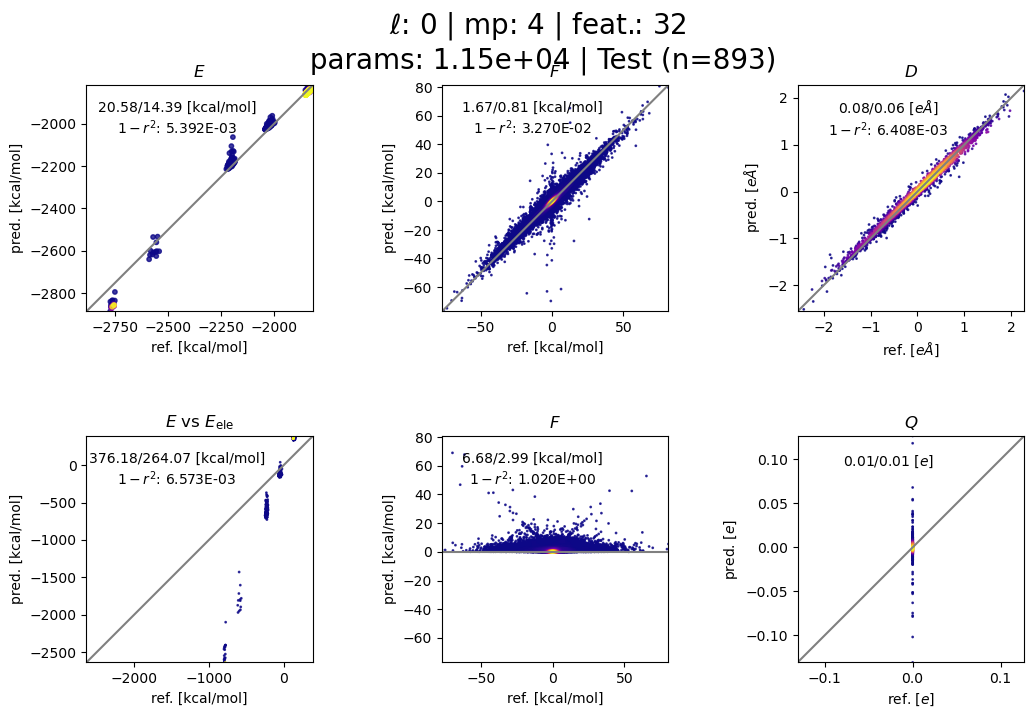

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 64
    max_degree = 0
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:01,  1.10s/it]

predF.shape (5217,)


2it [00:02,  1.10s/it]

predF.shape (5217,)


3it [00:03,  1.10s/it]

predF.shape (5217,)


4it [00:04,  1.10s/it]

predF.shape (5217,)


5it [00:05,  1.10s/it]

predF.shape (5217,)


6it [00:06,  1.10s/it]

predF.shape (5217,)


7it [00:07,  1.10s/it]

predF.shape (5217,)


8it [00:08,  1.10s/it]

predF.shape (5217,)


9it [00:09,  1.10s/it]

predF.shape (5217,)


10it [00:11,  1.10s/it]

predF.shape (5217,)


11it [00:12,  1.10s/it]

predF.shape (5217,)


12it [00:13,  1.10s/it]

predF.shape (5217,)


13it [00:14,  1.10s/it]

predF.shape (5217,)


14it [00:15,  1.10s/it]

predF.shape (5217,)


15it [00:16,  1.10s/it]

predF.shape (5217,)


16it [00:17,  1.10s/it]

predF.shape (5217,)


17it [00:18,  1.10s/it]

predF.shape (5217,)


18it [00:19,  1.10s/it]

predF.shape (5217,)


19it [00:20,  1.10s/it]

predF.shape (5217,)


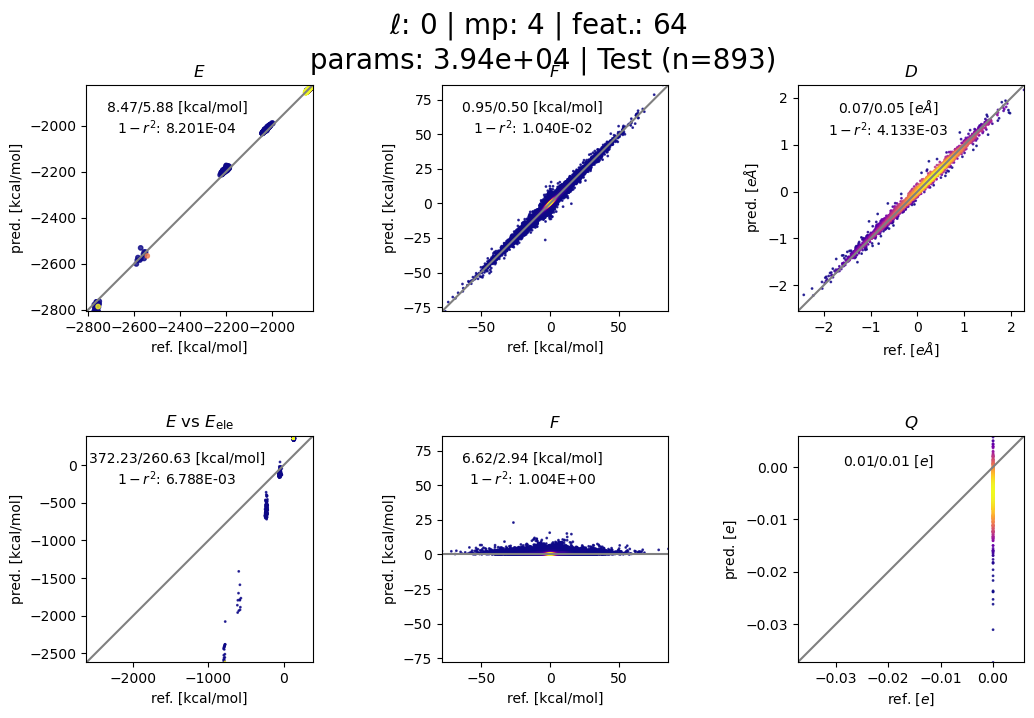

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 2
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)


1it [00:02,  2.06s/it]

predF.shape (5217,)


2it [00:04,  2.06s/it]

predF.shape (5217,)


3it [00:06,  2.06s/it]

predF.shape (5217,)


4it [00:08,  2.06s/it]

predF.shape (5217,)


5it [00:10,  2.06s/it]

predF.shape (5217,)


6it [00:12,  2.06s/it]

predF.shape (5217,)


7it [00:15,  2.30s/it]

predF.shape (5217,)


8it [00:17,  2.25s/it]

predF.shape (5217,)


9it [00:19,  2.21s/it]

predF.shape (5217,)


10it [00:21,  2.18s/it]

predF.shape (5217,)


11it [00:23,  2.16s/it]

predF.shape (5217,)


12it [00:25,  2.14s/it]

predF.shape (5217,)


13it [00:27,  2.12s/it]

predF.shape (5217,)


14it [00:29,  2.10s/it]

predF.shape (5217,)


15it [00:31,  2.09s/it]

predF.shape (5217,)


16it [00:34,  2.09s/it]

predF.shape (5217,)


17it [00:36,  2.08s/it]

predF.shape (5217,)


18it [00:38,  2.08s/it]

predF.shape (5217,)


19it [00:40,  2.12s/it]

predF.shape (5217,)


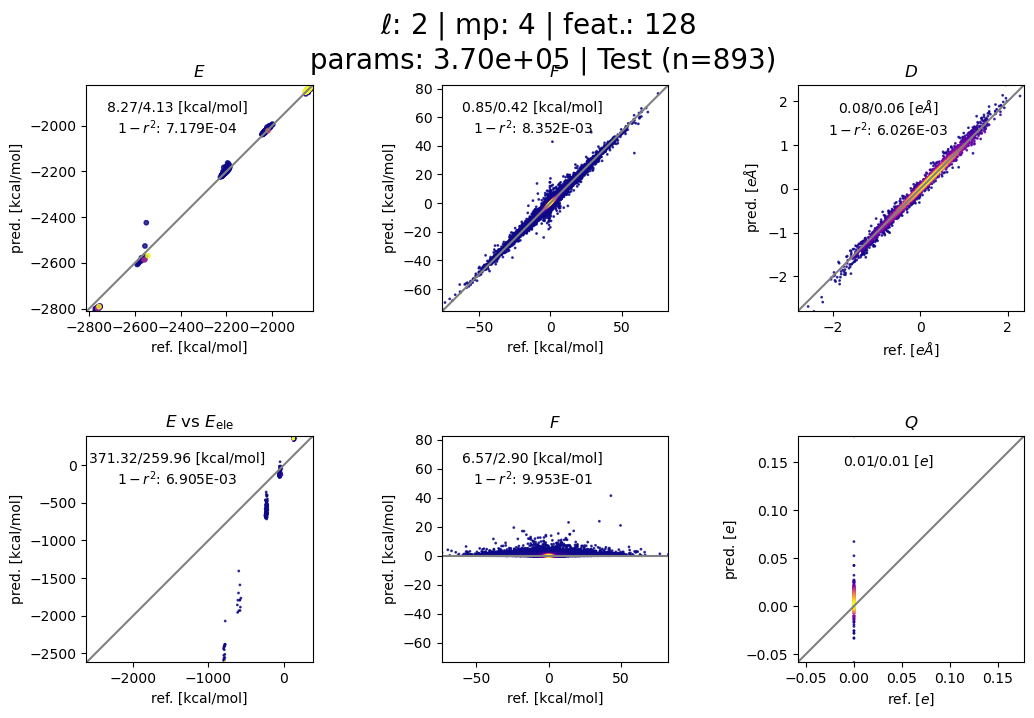

In [115]:

outputs = []
do_plot = True

for restart_dir in restart_dirs[:]:
    # restart = restart_dir / min_epoch
    # _ = list(restart_dir.glob("epoch*"))
    # _.sort(key=lambda x: abs(int(str(x.name).split("-")[1])   - int(min_epoch.split("-")[1])))
    # restart = _[0]
    restart = get_last(restart_dir)
    params,model = get_params_model(restart)
    print(model)
    model.natoms = 37
    model.zbl = False
    total_params = count_params(params)
    # print("Total number of parameters:", total_params)
    output = plot_stats(combined, model, params, _set=f"$\\ell$: {model.max_degree} | mp: {model.num_iterations} | feat.: {model.features} \n params: {total_params:.2e} | Test", 
                   do_kde=True, batch_size=batch_size, do_plot=do_plot)
    if do_plot:
        plt.savefig(f"analysis/{str(restart_dir.name)}_test.pdf", bbox_inches="tight")
        plt.show()
    outputs.append(output)


In [116]:
keys_to_compare = ['E_rmse',
 'E_mae',
 'F_rmse',
 'F_mae',
 'D_rmse',
 'D_mae',
 'n_params',
 'features',
 'max_degree',
 'num_iterations',
 'num_basis_functions',
 'cutoff',
 'max_atomic_number',
 'natoms',
 'total_charge',
 'n_res']

In [117]:
results_df = pl.concat([pl.DataFrame({k:v for k,v in _.items() if k in keys_to_compare}, strict=False) for _ in outputs])
results_df = results_df.sort("n_params")
results_df = results_df.with_columns((52.91772105638412*pl.col("F_rmse") + 8*pl.col("E_rmse") + 27.211386024367243*pl.col("D_rmse")).alias("combined_rmse"))


In [118]:
import seaborn as sns
sns.set_palette("crest")
# sns.color_palette("Spectral", as_cmap=True)

In [119]:
from physnetjax.tensorboard_interface import process_tensorboard_logs
from physnetjax.plot_run import  plot_run
import polars as pl

In [120]:
results_df.sort("max_degree")

shape: (34, 17)
┌───────────┬───────────┬──────────┬──────────┬───┬────────┬──────────────┬───────┬───────────────┐
│ E_rmse    ┆ E_mae     ┆ F_rmse   ┆ F_mae    ┆ … ┆ natoms ┆ total_charge ┆ n_res ┆ combined_rmse │
│ ---       ┆ ---       ┆ ---      ┆ ---      ┆   ┆ ---    ┆ ---          ┆ ---   ┆ ---           │
│ f32       ┆ f32       ┆ f32      ┆ f32      ┆   ┆ i64    ┆ str          ┆ i64   ┆ f32           │
╞═══════════╪═══════════╪══════════╪══════════╪═══╪════════╪══════════════╪═══════╪═══════════════╡
│ 24.403444 ┆ 18.679836 ┆ 1.707265 ┆ 0.945139 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 289.147949    │
│ 17.319599 ┆ 11.351873 ┆ 1.692531 ┆ 0.918885 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 232.76709     │
│ 18.339756 ┆ 13.415972 ┆ 1.683596 ┆ 0.862194 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 239.159149    │
│ 20.578358 ┆ 14.387497 ┆ 1.667242 ┆ 0.809464 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 255.058548    │
│ 10.929366 ┆ 5.891863  ┆ 1.298181 ┆ 0.724603 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 159.153259    │
│ …         ┆ …         ┆ …        ┆ …        ┆ … ┆ …      ┆ …            ┆ …     ┆ …             │
│ 11.665732 ┆ 7.723052  ┆ 0.751003 ┆ 0.390765 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 134.210358    │
│ 10.082706 ┆ 6.917726  ┆ 0.850916 ┆ 0.455338 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 127.166824    │
│ 7.5228    ┆ 5.692175  ┆ 0.68323  ┆ 0.362293 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 99.009956     │
│ 11.830441 ┆ 8.631104  ┆ 1.094098 ┆ 0.541469 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 155.030518    │
│ 8.265038  ┆ 4.132571  ┆ 0.846531 ┆ 0.418385 ┆ … ┆ 37     ┆ 0.0          ┆ 1     ┆ 113.165215    │
└───────────┴───────────┴──────────┴──────────┴───┴────────┴──────────────┴───────┴───────────────┘

In [121]:
# Faster than is_pareto_efficient_simple, but less readable.
def is_pareto_efficient(costs, return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return is_efficient_mask
    else:
        return is_efficient

def get_pareto_front(keys):
    costs = np.array(results_df[keys])
    pareto_front = is_pareto_efficient(costs)
    return pareto_front


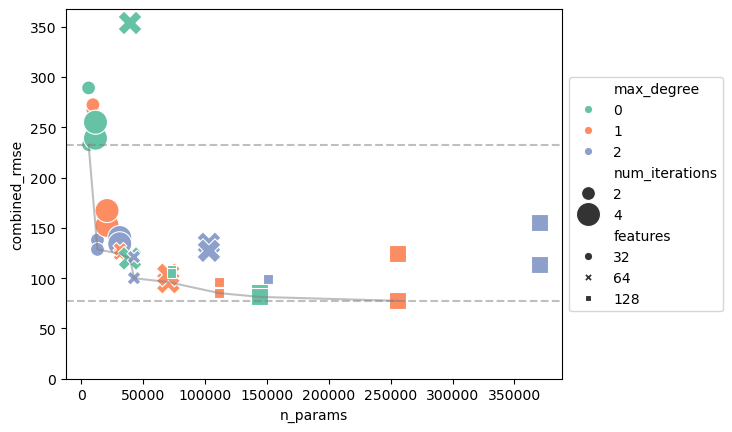

In [122]:
for i, ycol in enumerate(["combined_rmse"]):
    sns.scatterplot(results_df, x="n_params", y=ycol, hue="max_degree", style="features", size="num_iterations", 
                 # markers=[m[i] for _ in range(2)]
                    palette="Set2", sizes=(100, 300)
                )

keys = ["n_params", "combined_rmse"]
front = get_pareto_front(keys)
plt.plot(np.array(results_df["n_params"])[front], np.array(results_df["combined_rmse"])[front], color="gray", alpha=0.5)
plt.axhline(np.array(results_df["combined_rmse"])[front].min(), color="gray", alpha=0.5, linestyle="--")
plt.axhline(np.array(results_df["combined_rmse"])[front].max(), color="gray", alpha=0.5, linestyle="--")
plt.ylim(0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

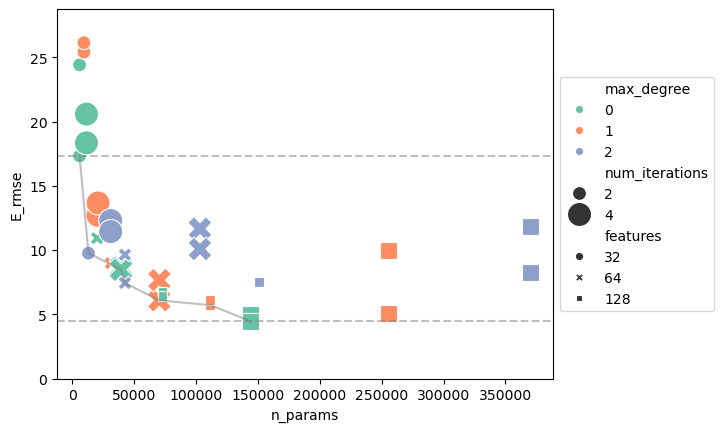

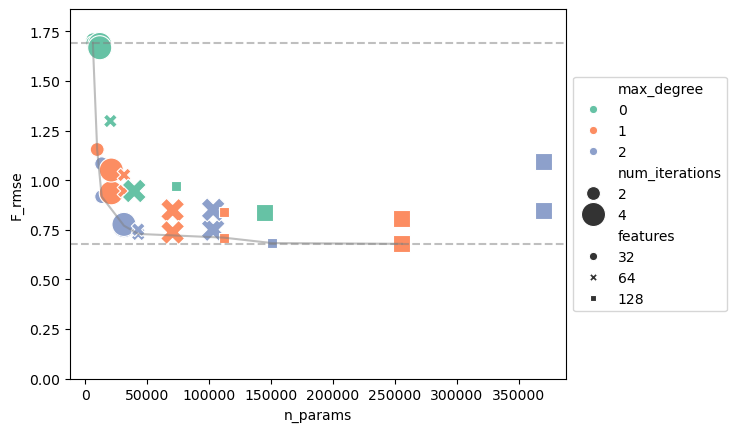

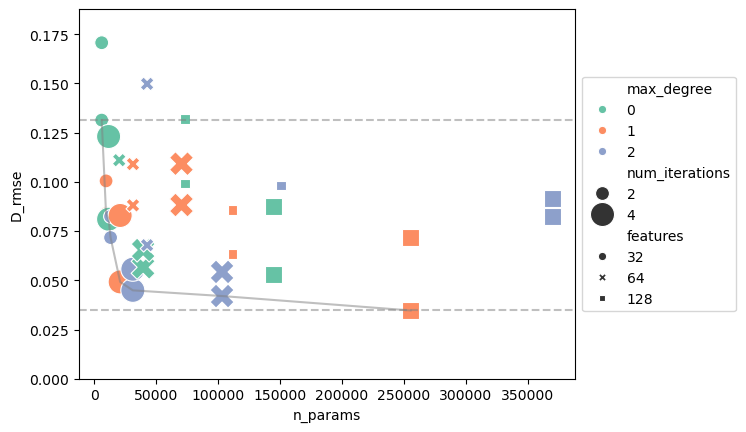

In [124]:
for i, ycol in enumerate(["E_rmse"]):
    sns.scatterplot(results_df, x="n_params", y=ycol, hue="max_degree", style="features", size="num_iterations", 
                 # markers=[m[i] for _ in range(2)]
                    palette="Set2", sizes=(100, 300)
                )
plt.ylim(0, np.array(results_df["E_rmse"])[front].max()*1.1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
keys = ["n_params", "E_rmse"]
front = get_pareto_front(keys)
plt.plot(np.array(results_df["n_params"])[front], np.array(results_df["E_rmse"])[front], color="gray", alpha=0.5)
plt.axhline(np.array(results_df["E_rmse"])[front].min(), color="gray", alpha=0.5, linestyle="--")
plt.axhline(np.array(results_df["E_rmse"])[front].max(), color="gray", alpha=0.5, linestyle="--")
plt.show()

for i, ycol in enumerate(["F_rmse"]):
    sns.scatterplot(results_df, x="n_params", y=ycol, hue="max_degree", style="features", size="num_iterations", 
                 # markers=[m[i] for _ in range(2)]
                    palette="Set2", sizes=(100, 300)
                )
plt.ylim(0, np.array(results_df["F_rmse"])[front].max()*1.1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
keys = ["n_params", "F_rmse"]
front = get_pareto_front(keys)
plt.plot(np.array(results_df["n_params"])[front], np.array(results_df["F_rmse"])[front], color="gray", alpha=0.5)
plt.axhline(np.array(results_df["F_rmse"])[front].min(), color="gray", alpha=0.5, linestyle="--")
plt.axhline(np.array(results_df["F_rmse"])[front].max(), color="gray", alpha=0.5, linestyle="--")
plt.show()


for i, ycol in enumerate(["D_rmse"]):
    sns.scatterplot(results_df, x="n_params", y=ycol, hue="max_degree", style="features", size="num_iterations", 
                 # markers=[m[i] for _ in range(2)]
                    palette="Set2", sizes=(100, 300)
                )
plt.ylim(0, np.array(results_df["D_rmse"])[front].max()*1.1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
keys = ["n_params", "D_rmse"]
front = get_pareto_front(keys)
plt.axhline(np.array(results_df["D_rmse"])[front].min(), color="gray", alpha=0.5, linestyle="--")
plt.axhline(np.array(results_df["D_rmse"])[front].max(), color="gray", alpha=0.5, linestyle="--")
plt.plot(np.array(results_df["n_params"])[front], np.array(results_df["D_rmse"])[front], color="gray", alpha=0.5)
plt.show()




In [126]:
file_names = restart_dirs
dfs = [process_tensorboard_logs(Path(str(f).split("epoch-")[0] + "/tfevents/")) for f in file_names]
file_names
dfs

[shape: (6_350, 14)
 ┌────────────┬────────────┬────────────┬────────────┬───┬───────────┬──────────┬───────┬───────────┐
 │ valid_ener ┆ valid_forc ┆ train_ener ┆ train_forc ┆ … ┆ dipole_w  ┆ forces_w ┆ epoch ┆ log       │
 │ gy_mae     ┆ es_mae     ┆ gy_mae     ┆ es_mae     ┆   ┆ ---       ┆ ---      ┆ ---   ┆ ---       │
 │ ---        ┆ ---        ┆ ---        ┆ ---        ┆   ┆ f64       ┆ f64      ┆ i64   ┆ str       │
 │ f64        ┆ f64        ┆ f64        ┆ f64        ┆   ┆           ┆          ┆       ┆           │
 ╞════════════╪════════════╪════════════╪════════════╪═══╪═══════════╪══════════╪═══════╪═══════════╡
 │ 558.37677  ┆ 21.908701  ┆ 280.962616 ┆ 10.253631  ┆ … ┆ 27.211386 ┆ 52.91    ┆ 0     ┆ /pchem-da │
 │            ┆            ┆            ┆            ┆   ┆           ┆          ┆       ┆ ta/meuwly │
 │            ┆            ┆            ┆            ┆   ┆           ┆          ┆       ┆ /boittier │
 │            ┆            ┆            ┆            ┆   ┆    

In [127]:
new_dfs = []
for i in range(len(file_names)):
    _ = dfs[i].with_columns(
        pl.col("epoch")
        # .map_elements(lambda x: 0, return_dtype=pl.Int64)
        .map_elements(lambda x: ls[i][0], return_dtype=pl.Int64)
        .alias("l")
    )
    _ = _.with_columns(pl.col("epoch").map_elements(lambda x: nits[i][0], return_dtype=pl.Int64).alias("nit"))
    # _ = _.with_columns(pl.col("epoch").map_elements(lambda x: 0, return_dtype=pl.Int64).alias("nit"))
    new_dfs.append(_.with_columns(
    pl.col("epoch").map_elements(lambda x: fs[i][0], return_dtype=pl.Int64).alias("f")))
    # pl.col("epoch").map_elements(lambda x: i, return_dtype=pl.Int64).alias("f")))

    

In [136]:
# new_dfs = pl.concat(new_dfs)
new_dfs = pl.concat(dfs)

# new_dfs = new_dfs.with_columns(
#     pl.col("log")
#     .map_elements(lambda x: x.split("/")[-3], return_dtype=pl.String)
#     .alias("uuid")
# )

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_run(base_df, ax, hue, label):
    base_df = base_df[::100]
    # base_df = base_df.to_pandas()
    # Define all the metrics to plot
    metrics = [
        "train_loss", "valid_loss", 
        "train_energy_mae", "valid_energy_mae", 
        "train_forces_mae", "valid_forces_mae", 
        "lr"
    ]
    

    
    # Plot each metric
    for i, ycol in enumerate(metrics):
        row = i % 2
        col = i // 2
        line = sns.lineplot(
            data=base_df, 
            x="epoch", y=ycol, 
            # hue=hue/33,
            color = sns.color_palette("Set2", 34)[hue],
            # style="f", size="nit", 
            ax=ax[row][col],
            # palette="set2", 
            label=label
            # legend=False 
        )
        ax[row][col].legend()
        lines, labels = [], []
            # Capture lines and labels for the shared legend
        for line_obj in line.get_lines():
            lines.append(line_obj)
        labels.append(i)
        
        # Apply shared settings
        # 
        # ax[row][col].set_xlim(1000)
        if ycol != "lr":
            ax[row][col].set_ylim(base_df[ycol].min()*0.5, base_df[ycol].median()+base_df[ycol].std())
            ax[row][col].set_yscale("log")
        ax[row][col].set_xlabel("Epoch")
        ax[row][col].set_ylabel(ycol)
        ax[row][col].get_legend().remove()  # Remove legend from the main plot
    
    # Adjust the legend on the separate axis
    handles, labels = ax[row][col].get_legend_handles_labels()
    ax[-1][-1].legend(
        handles=handles, labels=labels, 
        loc='center', title="Metrics"
    )
    ax[-1][-1].axis('off')  # Turn off axis for the legend space
    
    
    # plt.tight_layout()
    # plt.show()
    return ax


21 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-08a41d2b-b8f1-4a52-89ab-e0e3991a9b80
22 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-ab54bbb8-1d99-4852-90f0-be5de65b1e0f
23 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-948ae050-aeb3-47c2-9d55-7feed5b0a457
24 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-11a2f3ed-8f24-42f6-9826-e771bbcda48c
25 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-790736d2-59d2-4e61-9f61-2adbc68adf89
26 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-de829b95-6df7-40aa-8095-89d63908ac50
27 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-a45b7f73-3c7d-41c5-96e0-f0a83889293a
28 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-3f0b4338-3dc7-4006-be1f-39255bd8003a
29 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-893efd80-8eb6-4386-ad09-c3e8fa5c97ec
30 /pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-b8b88599-315a-425a-adfd-8807e351f9c2


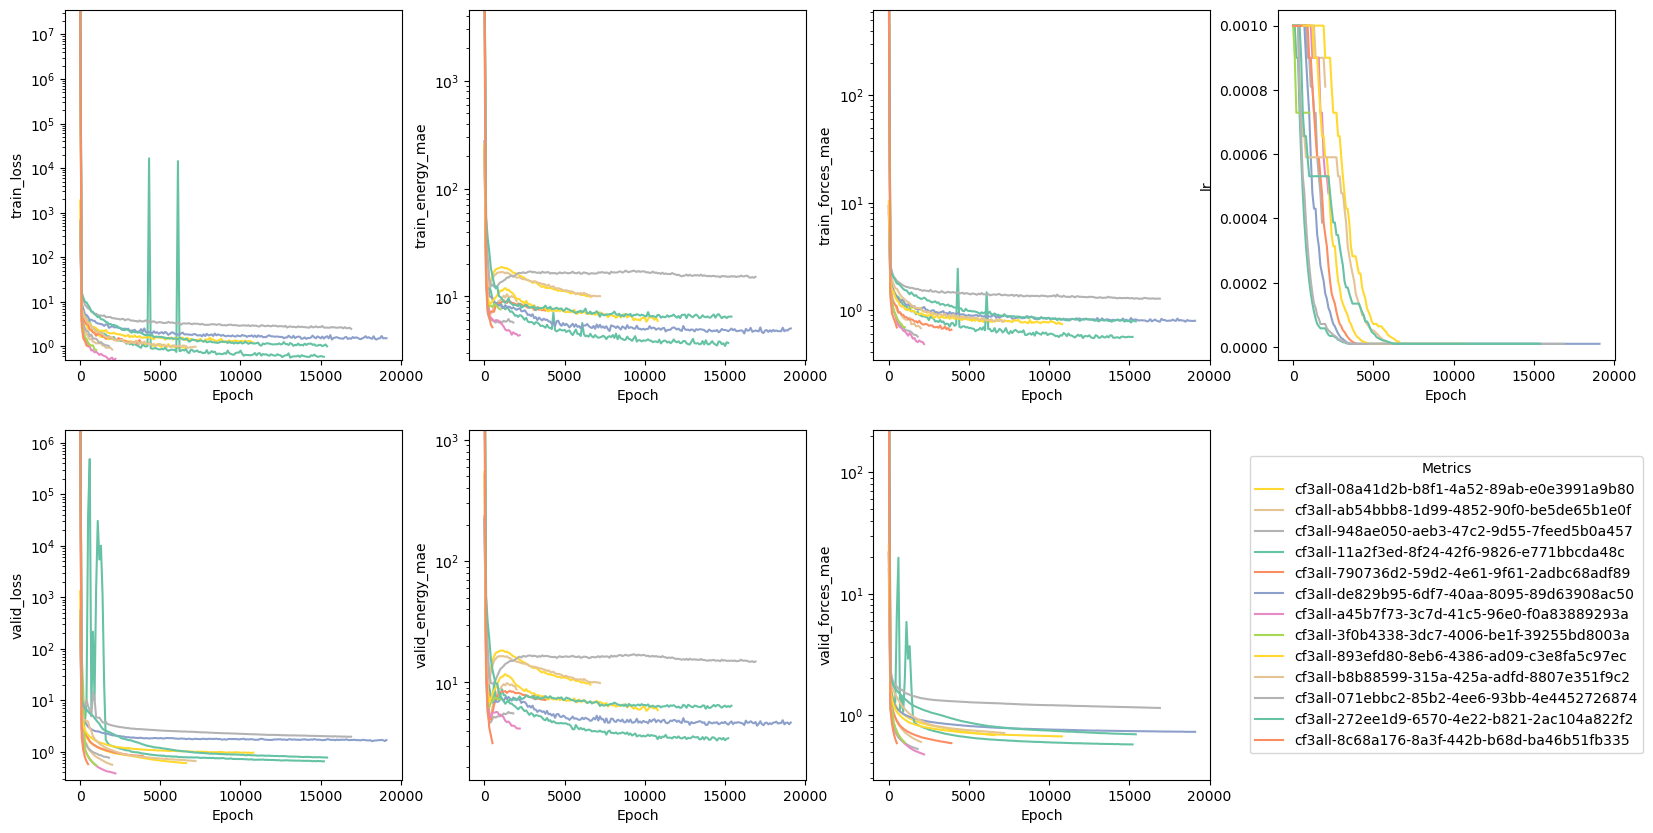

In [192]:
# Set up the plot
fig, ax = plt.subplots(2,4,figsize=(20, 10))
for i, _ in enumerate(file_names[:]):
    if 21 <= i :
        print(i, _)
        ax = plot_run(dfs[i], ax, i, str(_).split("/")[-1])
plt.show()

In [490]:
import io
import ase
import ase.calculators.calculator as ase_calc
import ase.io as ase_io
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution, Stationary, ZeroRotation
from ase.md.verlet import VelocityVerlet
import ase.optimize as ase_opt
import matplotlib.pyplot as plt
import py3Dmol


# Initialize atoms object and attach calculator.

d = train_data

sel = np.where(train_data['N'] == 37)[0]

i = sel[88]

print(d["Z"][i])
print(d['N'][i])
Natoms = d['N'][i][0] #32 #len(np.nonzero(R.sum(axis=1))[0])
print(Natoms)
model.natoms = Natoms
R = d['R'][i][:Natoms] # - np.mean(train_data['R'][i][:Natoms], axis=0)
print(R.sum(axis=1))
print(R)
print(d['Z'][i])
print("..", (np.nonzero(R.sum(axis=-1))[0].shape[0]))
#Natoms = np.nonzero(R.sum(axis=-1))[0].shape[0]
print(R.shape)
print(d["E"][i])



atoms = ase.Atoms(d['Z'][i][:Natoms], R[:Natoms] - R[:Natoms].mean(axis=0))
print(atoms)
res = "/pchem-data/meuwly/boittier/home/pycharmm_test/ckpts/cf3all-a45b7f73-3c7d-41c5-96e0-f0a83889293a"
restart = get_last(res)
params, model = get_params_model(restart)
print(model)
kwas = model.return_attributes()
print(kwas)
# model = EF(**kwas)
model.zbl = False
model.natoms = len(atoms)
# print(model)

@jax.jit
def evaluate_energies_and_forces(atomic_numbers, positions, dst_idx, src_idx):
  return model.apply(params,
    atomic_numbers=atomic_numbers,
    positions=positions,
    dst_idx=dst_idx,
    src_idx=src_idx,
  )


class MessagePassingCalculator(ase_calc.Calculator):
  implemented_properties = ["energy", "forces", "dipole"]

  def calculate(self, atoms, properties, system_changes = ase.calculators.calculator.all_changes):
    ase_calc.Calculator.calculate(self, atoms, properties, system_changes)
    dst_idx, src_idx = e3x.ops.sparse_pairwise_indices(len(atoms))
    output = evaluate_energies_and_forces(
      atomic_numbers=atoms.get_atomic_numbers(),
      positions=atoms.get_positions(),
      dst_idx=dst_idx,
      src_idx=src_idx
    )

    dipole = dipole_calc(atoms.get_positions(), 
                         atoms.get_atomic_numbers(), 
                         output["charges"],
                np.zeros_like(atoms.get_atomic_numbers()),
                1)
    self.results["dipole"] = dipole
    self.results['energy'] = output["energy"].squeeze() #* (ase.units.kcal/ase.units.mol)
    self.results['forces'] = output["forces"] #* (ase.units.kcal/ase.units.mol) #/ase.units.Angstrom

[6 1 1 1 6 8 7 1 6 1 6 1 1 1 6 8 7 1 6 1 1 1 8 1 1 8 1 1 8 1 1 8 1 1 8 1 1]
[37]
37
[-10.60972454  -8.91284632 -10.75600094 -10.75064754 -12.62640969
 -14.42914659 -12.4296276  -13.85759213 -10.46808926 -11.04512067
  -9.78875204 -11.37131422  -8.76544652  -8.79123205  -8.41094191
  -8.60012416  -6.40409171  -6.42884124  -4.34666742  -4.81860763
  -3.25319195  -3.35101267  -2.1134388   -3.04457047  -3.125377
 -16.31502851 -17.05119604 -17.35928308  -3.51694006  -2.26775753
  -2.81186151  -5.15616335  -5.71594382  -6.50864336  -8.36671987
  -8.55412577  -6.73636034]
[[-10.25765     -1.50426703   1.15219249]
 [ -9.49653753  -0.73478755   1.31847876]
 [ -9.93465901  -2.43967385   1.61833192]
 [-11.19423873  -1.18565064   1.62924183]
 [-10.51842363  -1.79703012  -0.31095595]
 [-10.82338497  -2.92039011  -0.68537151]
 [-10.46087034  -0.76648976  -1.2022675 ]
 [-10.63777308  -1.06652738  -2.15329168]
 [-10.09086377   0.61685561  -0.9940811 ]
 [-10.13118364   1.07761042  -1.99154744]
 [-11.07

/pchem-data/meuwly/boittier/home/miniforge3/envs/jaxphyscharmm/lib/python3.12/site-packages/orbax/checkpoint/type_handlers.py:1372: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


dict_keys(['opt_state', 'params', 'step'])
EF(
    # attributes
    features = 128
    max_degree = 1
    num_iterations = 4
    num_basis_functions = 20
    cutoff = 10.0
    max_atomic_number = 9
    charges = True
    natoms = None
    total_charge = '0.0'
    n_res = 1
    zbl = False
    debug = False
)
{'features': 128, 'max_degree': 1, 'num_iterations': 4, 'num_basis_functions': 20, 'cutoff': 10.0, 'max_atomic_number': 9, 'charges': True, 'natoms': None, 'total_charge': '0.0', 'n_res': 1}


In [491]:

atoms.set_calculator(MessagePassingCalculator())

# Write structure to xyz file.
xyz = io.StringIO()
ase_io.write(xyz, atoms, format='xyz')

# Visualize the structure with py3Dmol.
view = py3Dmol.view()
view.addModel(xyz.getvalue(), 'xyz')
view.setStyle({'stick': {'radius': 0.15}, 'sphere': {'scale': 0.25}})
view.show()



/tmp/ipykernel_122020/4040092950.py:1: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(MessagePassingCalculator())


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [492]:
# Run structure optimization with BFGS.
_ = ase_opt.LBFGS(atoms).run(fmax=0.001,steps=1000)
print()

       Step     Time          Energy          fmax
LBFGS:    0 23:45:19     -121.126297        0.215310
LBFGS:    1 23:45:19     -121.131279        0.185762
LBFGS:    2 23:45:19     -121.138794        0.211357
LBFGS:    3 23:45:19     -121.153915        0.420821
LBFGS:    4 23:45:19     -121.164352        0.298255
LBFGS:    5 23:45:19     -121.175423        0.210807
LBFGS:    6 23:45:19     -121.186646        0.214288
LBFGS:    7 23:45:19     -121.199585        0.299344
LBFGS:    8 23:45:19     -121.212631        0.322154
LBFGS:    9 23:45:19     -121.223625        0.219018
LBFGS:   10 23:45:19     -121.232796        0.206202
LBFGS:   11 23:45:19     -121.244850        0.221663
LBFGS:   12 23:45:19     -121.258568        0.367441
LBFGS:   13 23:45:19     -121.271591        0.318588
LBFGS:   14 23:45:19     -121.279427        0.224386
LBFGS:   15 23:45:19     -121.284821        0.213086
LBFGS:   16 23:45:19     -121.293297        0.253667
LBFGS:   17 23:45:19     -121.306198        0.30

In [493]:
print(atoms.get_dipole_moment())
# Write structure to xyz file.
xyz = io.StringIO()
ase_io.write(xyz, atoms, format='xyz')
# Visualize the structure with py3Dmol.
view = py3Dmol.view()
view.addModel(xyz.getvalue(), 'xyz')
view.setStyle({'stick': {'radius': 0.15}, 'sphere': {'scale': 0.25}})
view.show()

[[1.7872174  0.70209897 0.49025187]]


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [494]:
# Parameters.
temperature = 300.0
timestep_fs = 0.1
num_steps = 100_0

# Draw initial momenta.
MaxwellBoltzmannDistribution(atoms, temperature_K=temperature)
Stationary(atoms)  # Remove center of mass translation.
ZeroRotation(atoms)  # Remove rotations.

# Initialize Velocity Verlet integrator.
integrator = VelocityVerlet(atoms, timestep=timestep_fs*ase.units.fs)

# Run molecular dynamics.
frames = np.zeros((num_steps, len(atoms), 3))
dipoles = np.zeros((num_steps, 1, 3))
potential_energy = np.zeros((num_steps,))
kinetic_energy = np.zeros((num_steps,))
total_energy = np.zeros((num_steps,))
for i in range(num_steps):
  # Run 1 time step.
  integrator.run(1)
  # Save current frame and keep track of energies.
  frames[i] = atoms.get_positions()
  potential_energy[i] = atoms.get_potential_energy()
  kinetic_energy[i] = atoms.get_kinetic_energy()
  total_energy[i] = atoms.get_total_energy()
  dipoles[i]=atoms.get_dipole_moment()
  # Occasionally print progress.q
  if i % 1000 == 0:
    print(f"step {i:5d} epot {potential_energy[i]: 5.3f} ekin {kinetic_energy[i]: 5.3f} etot {total_energy[i]: 5.3f}")
    MaxwellBoltzmannDistribution(atoms, temperature_K=temperature)

step     0 epot -130.417 ekin  1.544 etot -128.873


In [495]:
view.getModel().setCoordinates(frames[::10], 'array')
view.animate({'loop': None, 'interval': 0.1})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
%matplotlib inline
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.xlabel('time [fs]')
plt.ylabel('energy [eV]')
time = np.arange(num_steps) * timestep_fs
plt.plot(time, potential_energy, label='potential energy')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, kinetic_energy, label='kinetic energy')
plt.legend()
plt.grid()
plt.show()
plt.plot(time, total_energy - total_energy.mean(), label='total energy')
plt.legend()
plt.ylim(-23/1000, 23/1000)
plt.xlabel('time [fs]')
plt.ylabel('energy [eV]')
plt.grid()

In [ ]:
r = dipoles
# for i in range(3):

plt.plot(np.linalg.norm(r,axis=-1))

In [ ]:
from physnetjax.ir import autocorrelation_ft, intensity_correction, rolling_avg
temm =total_energy - total_energy.mean()
total_E_stack = np.stack([temm, temm, temm]).T

freq, spectra = autocorrelation_ft(total_E_stack, timestep_fs * 0.001 )
# freq, spectra = intensity_correction(freq, spectra, 1000000000000000)
freq, spectra = rolling_avg(freq, spectra)
total_E_stack.shape

In [ ]:
plt.plot(freq, spectra)
# plt.ylim(0,0.2)
plt.yscale("log")
plt.xlim(1, 4000)
# .shape, dipoles.shape

In [ ]:
from physnetjax.ir import autocorrelation_ft, intensity_correction, rolling_avg
freq, spectra = autocorrelation_ft(dipoles.squeeze(), timestep_fs * 0.001 )
freq, spectra = intensity_correction(freq, spectra, 1000000000000000)
freq, spectra = rolling_avg(freq, spectra, 2)

In [ ]:
from physnetjax.ir import autocorrelation_ft, intensity_correction, rolling_avg
freq, spectra = autocorrelation_ft(dipoles.squeeze(), timestep_fs * 0.001 )
freq, spectra = intensity_correction(freq, spectra, 1000000000000000)
freq, spectra = rolling_avg(freq, spectra)

In [ ]:
plt.plot(freq, spectra)
# plt.ylim(0,0.2)
plt.xlim(1, 4000)

In [ ]:
plt.plot(freq, spectra)
# plt.ylim(0,0.2)
plt.xlim(1, 4000)